# 0. 필요한 라이브러리 설치

In [ ]:
# 버전 확인
import sys
print(sys.version)

3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.0 MB/s 
     |████████████████████████████████| 1.3 MB 59.5 MB/s 
     |████████████████████████████████| 1.7 MB 38.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 274 kB 58.0 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 261 kB 53.3 MB/s 
     |████████████████████████████████| 2.0 MB 33.6 MB/s 
     |████████████████████████████████| 114 kB 55.4 MB/s 
     |████████████████████████████████| 167 kB 52.4 MB/s 
     |████████████████████████████████| 6.8 MB 31.6 MB/s 
     |████████████████████████████████| 15.6 MB 45.1 MB/s 
     |████████████████████████████████| 10.9 MB 31.2 MB/s 
     |████████████████████████████████| 675 kB 61.1 MB/s 
     |████████████████

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,223 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
pip install numpy --upgrade

     |████████████████████████████████| 15.7 MB 159 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


런타임 다시 시작

# 1. 경로 설정 및 필요한 라이브러리 로드

In [ ]:
# 경로 설정
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm

#모델 임포트
import pycaret 
pycaret.__version__
from pycaret.regression import *

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# 경로를 입력해주세요.
path = '/content/drive/MyDrive/조달공모전/data/'

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
pip list

Package                       Version
----------------------------- --------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
alembic                       1.7.6
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Boruta                        0.3
Bottleneck                    1.3.2
branca         

In [ ]:
pip list | grep scikit-learn

scikit-learn                  0.23.2


# 2. 데이터 탐색
먼저 이용할 데이터들의 shape와 변수들, 그리고 결측치 비율을 확인해봤다.

## 용역 입찰분류별 투찰 내역
용역 입찰분류별 투찰업체 내역을 제공하는 보고서

In [ ]:
scsbid_df = pd.read_csv(path+'용역+입찰분류별+투찰업체+내역(00029)_2021_1.csv', encoding = 'utf-8')
scsbid_df.head(n=3)

,등록유형,용역구분,조달구분,공고시스템명,입찰공고번호,입찰공고차수,입찰분류번호,공고게시일자,공고명,공고기관명,공고기관코드,실수요기관명,수요기관명,수요기관코드,수요기관구분,수요기관지역명,입찰방식,입찰계약방법,낙찰자결정방법,낙찰하한율,입찰서개시일자,입찰서마감일자,개찰일자,참가수,개찰순위,입찰업체명,입찰업체사업자등록번호,입찰업체기업구분명,입찰일자,입찰시간,입찰률,입찰금액,낙찰여부,부적격여부,부적격사유,공동도급구성방식명,긴급공고여부,품명내용,세부품명내용,업종제한여부,업종제한내용,기초금액,추정가격,배정예산,예정가격,조항호코드,조항호명,정보화사업여부,기술평가대행여부,참조번호,조달요청번호
0,나라장터(G2B),일반용역,자체조달,NaN,20210115607,0,0,20210123,2021학년도 오산숲유치원 통학차량 임차용역 제한경쟁 입찰 공고,경기도교육청 경기도화성오산교육지원청 오산숲유치원,7679438,경기도교육청 경기도화성오산교육지원청 오산숲유치원,경기도교육청 경기도화성오산교육지원청 오산숲유치원,7679438,교육기관,경기도 오산시,전자입찰,제한(총액),[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),84.245,20210123.0,20210201.0,20210201,4.0,1.0,(주)화진관광여행사,1248167572,중소기업,20210125.0,11:49:19,88.203,160000000.0,N,N,NaN,공동수급불허,N,NaN,NaN,Y,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],179379000.0,163071818.0,179379000.0,181397950.0,NaN,NaN,NaN,NaN,오산숲유치원 공고 제2021-3호,NaN
1,나라장터(G2B),일반용역,자체조달,NaN,20210115607,0,0,20210123,2021학년도 오산숲유치원 통학차량 임차용역 제한경쟁 입찰 공고,경기도교육청 경기도화성오산교육지원청 오산숲유치원,7679438,경기도교육청 경기도화성오산교육지원청 오산숲유치원,경기도교육청 경기도화성오산교육지원청 오산숲유치원,7679438,교육기관,경기도 오산시,전자입찰,제한(총액),[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),84.245,20210123.0,20210201.0,20210201,4.0,2.0,비제이투어주식회사,1358602991,중소기업,20210127.0,12:25:14,94.753,171880957.0,N,N,NaN,공동수급불허,N,NaN,NaN,Y,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],179379000.0,163071818.0,179379000.0,181397950.0,NaN,NaN,NaN,NaN,오산숲유치원 공고 제2021-3호,NaN
2,나라장터(G2B),일반용역,자체조달,NaN,20210115607,0,0,20210123,2021학년도 오산숲유치원 통학차량 임차용역 제한경쟁 입찰 공고,경기도교육청 경기도화성오산교육지원청 오산숲유치원,7679438,경기도교육청 경기도화성오산교육지원청 오산숲유치원,경기도교육청 경기도화성오산교육지원청 오산숲유치원,7679438,교육기관,경기도 오산시,전자입찰,제한(총액),[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),84.245,20210123.0,20210201.0,20210201,4.0,3.0,타요관광 주식회사,1258622554,중소기업,20210127.0,10:00:03,96.415,174895000.0,Y,N,NaN,공동수급불허,N,NaN,NaN,Y,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],179379000.0,163071818.0,179379000.0,181397950.0,NaN,NaN,NaN,NaN,오산숲유치원 공고 제2021-3호,NaN


**2021 데이터 합치기**

조달정보개방포털에서 다운받을 수 있는 데이터의 크기가 한정되어있기 때문에, 2021년 데이터를 11번에 걸쳐 나누어 받았음.

In [ ]:
for i in tqdm(range(2,12)):
  tmp_df = pd.read_csv(path+'용역+입찰분류별+투찰업체+내역(00029)_2021_'+str(i)+'.csv', encoding = 'utf-8')
  scsbid_df = pd.concat([scsbid_df, tmp_df])

scsbid_df.info()

100%|██████████| 10/10 [00:47<00:00,  4.78s/it]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495719 entries, 0 to 131875
Data columns (total 51 columns):
 #   Column       Dtype  
---  ------       -----  
 0   등록유형         object 
 1   용역구분         object 
 2   조달구분         object 
 3   공고시스템명       object 
 4   입찰공고번호       object 
 5   입찰공고차수       int64  
 6   입찰분류번호       int64  
 7   공고게시일자       int64  
 8   공고명          object 
 9   공고기관명        object 
 10  공고기관코드       object 
 11  실수요기관명       object 
 12  수요기관명        object 
 13  수요기관코드       object 
 14  수요기관구분       object 
 15  수요기관지역명      object 
 16  입찰방식         object 
 17  입찰계약방법       object 
 18  낙찰자결정방법      object 
 19  낙찰하한율        float64
 20  입찰서개시일자      float64
 21  입찰서마감일자      float64
 22  개찰일자         int64  
 23  참가수          float64
 24  개찰순위         float64
 25  입찰업체명        object 
 26  입찰업체사업자등록번호  object 
 27  입찰업체기업구분명    object 
 28  입찰일자         float64
 29  입찰시간         object 
 30  입찰률          float64
 31  입찰금액         float64
 32 

In [ ]:
print('낙찰여부가 Y인 행 제거하기 전 row 수 :',len(scsbid_df))
scsbid_df = scsbid_df[scsbid_df['낙찰여부']=='Y']
print('낙찰여부가 Y인 행 제거한 후 row 수 :',len(scsbid_df),'\n\n')
scsbid_df.info()

낙찰여부가 Y인 행 제거하기 전 row 수 : 2495719
낙찰여부가 Y인 행 제거한 후 row 수 : 80618 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80618 entries, 2 to 131863
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   등록유형         80618 non-null  object 
 1   용역구분         80618 non-null  object 
 2   조달구분         80618 non-null  object 
 3   공고시스템명       501 non-null    object 
 4   입찰공고번호       80618 non-null  object 
 5   입찰공고차수       80618 non-null  int64  
 6   입찰분류번호       80618 non-null  int64  
 7   공고게시일자       80618 non-null  int64  
 8   공고명          80618 non-null  object 
 9   공고기관명        80618 non-null  object 
 10  공고기관코드       80618 non-null  object 
 11  실수요기관명       80618 non-null  object 
 12  수요기관명        80618 non-null  object 
 13  수요기관코드       80618 non-null  object 
 14  수요기관구분       80113 non-null  object 
 15  수요기관지역명      80113 non-null  object 
 16  입찰방식         80618 non-null  object 
 17  입찰계약방법       80552 

데이터 탐색 과정에서 같은 의미라고 판단한 변수 및 문자열 변수 제거

In [ ]:
# 살릴 변수들
features = ['등록유형', '조달구분','입찰공고번호','입찰공고차수','입찰분류번호','수요기관구분','수요기관지역명',
            '품명내용','긴급공고여부','추정가격','배정예산','입찰서마감일자','입찰서개시일자','입찰방식',
            '기초금액','예정가격','참가수','개찰순위','입찰률','입찰금액','낙찰자결정방법','입찰계약방법',
            '업종제한여부','공동도급구성방식명','조항호코드','정보화사업여부','기술평가대행여부','낙찰하한율']

scsbid_df = scsbid_df[features]
scsbid_df.columns

Index(['등록유형', '조달구분', '입찰공고번호', '입찰공고차수', '입찰분류번호', '수요기관구분', '수요기관지역명',
       '품명내용', '긴급공고여부', '추정가격', '배정예산', '입찰서마감일자', '입찰서개시일자', '입찰방식', '기초금액',
       '예정가격', '참가수', '개찰순위', '입찰률', '입찰금액', '낙찰자결정방법', '입찰계약방법', '업종제한여부',
       '공동도급구성방식명', '조항호코드', '정보화사업여부', '기술평가대행여부', '낙찰하한율'],
      dtype='object')

In [ ]:
scsbid_df['조항호코드'].value_counts()

02701000-20101022     2804
02703000-20200501     1169
00201020-20130506     1119
02101080-20101022     1097
04300000-20101022      996
00201010-20130506      759
02001080-20101027      728
02601000-20101027      373
01001000-20101022      315
0260102바-20101022      260
02603000-20200714      184
04301000-20101027       84
0260105마-20101022       74
0260105아-20201001       70
01200000-20101027       63
02101060-20101022       62
02001060-20160930       61
04200000-20101022       53
0210110나-20181204       39
0210110가-20181204       27
02101050-20101022       16
0260105가3-20210706      12
04201000-20101027       11
0260101가-20101022       10
0260102사-20101022       10
0260105가2-20160930       8
0260102자-20101022        7
02606020-20200501        7
01803000-20101022        6
02503020-20200714        6
0260105바-20101022        5
0260105가4-20210706       5
02606030-20200501        5
0260101나-20101022        4
02606040-20200501        4
02503030-20200714        3
0260105가5-20210706       3
0

### 결측치비율 확인

In [ ]:
nan_counts = scsbid_df.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(scsbid_df)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
기술평가대행여부,76064,0.943511
품명내용,70149,0.870141
정보화사업여부,70149,0.870141
조항호코드,70149,0.870141
낙찰하한율,23105,0.286599
기초금액,19397,0.240604
입찰률,12387,0.153651
예정가격,10697,0.132687
긴급공고여부,6371,0.079027
공동도급구성방식명,4134,0.051279


결측치 비율이 70% 이상인 변수 확인

In [ ]:
nan_counts[nan_counts['결측치비율']>0.7].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
기술평가대행여부,76064,0.943511
품명내용,70149,0.870141
조항호코드,70149,0.870141
정보화사업여부,70149,0.870141


In [ ]:
over_70 = nan_counts[nan_counts['결측치비율']>0.7].index
print(over_70)
print('\n\n결측치가 70% 이상인 변수 개수 : ',len(over_70))

Index(['품명내용', '조항호코드', '정보화사업여부', '기술평가대행여부'], dtype='object')


결측치가 70% 이상인 변수 개수 :  4


### 결측치가 40~ 70%인 변수 확인

In [ ]:
nan_counts[(nan_counts['결측치비율']>=0.4) & (nan_counts['결측치비율']<=0.7)].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율


In [ ]:
#입찰서개시일자, 입찰서마감일자 nan 값 제거
scsbid_df.dropna(subset=['입찰서개시일자','입찰서마감일자'], inplace=True)
nan_counts = scsbid_df.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(scsbid_df)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
기술평가대행여부,73339,0.941535
품명내용,67426,0.865623
정보화사업여부,67426,0.865623
조항호코드,67426,0.865623
낙찰하한율,20404,0.261949
기초금액,16672,0.214037
예정가격,10163,0.130474
입찰률,10140,0.130179
긴급공고여부,6153,0.078993
공동도급구성방식명,4125,0.052957


In [ ]:
scsbid_df.dtypes[(scsbid_df.dtypes == 'float64') | (scsbid_df.dtypes == 'int64')]

입찰공고차수       int64
입찰분류번호       int64
추정가격       float64
배정예산       float64
입찰서마감일자    float64
입찰서개시일자    float64
기초금액       float64
예정가격       float64
참가수        float64
개찰순위       float64
입찰률        float64
입찰금액       float64
낙찰하한율      float64
dtype: object

In [ ]:
# float type to object type
scsbid_df['입찰서개시일자'] = scsbid_df['입찰서개시일자'].astype(str)
scsbid_df['입찰서마감일자'] = scsbid_df['입찰서마감일자'].astype(str)
scsbid_df['입찰분류번호'] = scsbid_df['입찰분류번호'].astype(str)

scsbid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77893 entries, 2 to 131863
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   등록유형       77893 non-null  object 
 1   조달구분       77893 non-null  object 
 2   입찰공고번호     77893 non-null  object 
 3   입찰공고차수     77893 non-null  int64  
 4   입찰분류번호     77893 non-null  object 
 5   수요기관구분     77388 non-null  object 
 6   수요기관지역명    77388 non-null  object 
 7   품명내용       10467 non-null  object 
 8   긴급공고여부     71740 non-null  object 
 9   추정가격       77724 non-null  float64
 10  배정예산       76938 non-null  float64
 11  입찰서마감일자    77893 non-null  object 
 12  입찰서개시일자    77893 non-null  object 
 13  입찰방식       77893 non-null  object 
 14  기초금액       61221 non-null  float64
 15  예정가격       67730 non-null  float64
 16  참가수        77420 non-null  float64
 17  개찰순위       77826 non-null  float64
 18  입찰률        67753 non-null  float64
 19  입찰금액       77886 non-null  float64
 20  낙찰자결정

In [ ]:
scsbid_df = scsbid_df.reset_index(drop=True)

In [ ]:
scsbid_df['입찰기간'] = np.nan
for i in tqdm(range(len(scsbid_df))):
  scsbid_df.loc[i,'입찰서마감일자']  = datetime.datetime.strptime(scsbid_df['입찰서마감일자'][i][:8],'%Y%m%d')
  scsbid_df.loc[i,'입찰서개시일자'] = datetime.datetime.strptime(scsbid_df['입찰서개시일자'][i][:8],'%Y%m%d')
  scsbid_df['입찰기간'][i] = scsbid_df.loc[i,'입찰서마감일자'] - scsbid_df.loc[i,'입찰서개시일자']
  
scsbid_df['입찰기간']

100%|██████████| 77893/77893 [07:16<00:00, 178.29it/s]


0        9 days, 0:00:00
1        9 days, 0:00:00
2        7 days, 0:00:00
3        2 days, 0:00:00
4        6 days, 0:00:00
              ...       
77888    6 days, 0:00:00
77889    8 days, 0:00:00
77890    6 days, 0:00:00
77891    8 days, 0:00:00
77892    7 days, 0:00:00
Name: 입찰기간, Length: 77893, dtype: object

In [ ]:
scsbid_df['입찰기간'] = scsbid_df['입찰기간'].astype(str)

for i in tqdm(range(len(scsbid_df))):
  scsbid_df.loc[i,'입찰기간'] = scsbid_df.loc[i, '입찰기간'].split(' ')[0]

scsbid_df['입찰기간']

100%|██████████| 77893/77893 [02:19<00:00, 559.24it/s]


0        9
1        9
2        7
3        2
4        6
        ..
77888    6
77889    8
77890    6
77891    8
77892    7
Name: 입찰기간, Length: 77893, dtype: object

In [ ]:
scsbid_df['입찰기간'].unique()

array(['9', '7', '2', '6', '5', '3', '8', '4', '11', '21', '10', '19',
       '20', '22', '0:00:00', '12', '15', '13', '14', '41', '40', '25',
       '18', '1', '16', '17', '43', '42', '35', '36', '27', '30', '24',
       '34', '26', '39', '29', '32', '28', '33', '31', '23', '44', '45',
       '37'], dtype=object)

In [ ]:
scsbid_df.loc[scsbid_df['입찰기간']=='0:00:00','입찰기간'] = '0'
scsbid_df['입찰기간'].unique()

array(['9', '7', '2', '6', '5', '3', '8', '4', '11', '21', '10', '19',
       '20', '22', '0', '12', '15', '13', '14', '41', '40', '25', '18',
       '1', '16', '17', '43', '42', '35', '36', '27', '30', '24', '34',
       '26', '39', '29', '32', '28', '33', '31', '23', '44', '45', '37'],
      dtype=object)

## 용역 입찰공고 내역
기술용역/일반용역에대한 입찰공고 내역을 제공하는 보고서

In [ ]:
bidPblanc_df = pd.read_csv(path+'용역+입찰공고+내역(00027)_2021-2022.csv', encoding = 'utf-8')
bidPblanc_df.head(n=3)

,등록유형,용역구분,조달구분,공고시스템명,입찰공고번호,입찰공고차수,공고게시일자,공고명,공고기관명,실수요기관명,수요기관명,수요기관코드,수요기관구분,수요기관지역명,품명내용,세부품명내용,합계수량,합계금액,납품기한,긴급공고여부,정정공고여부,취소공고여부,추정가격,배정예산,입찰참가자격등록마감일자,입찰서개시일자,입찰서마감일자,개찰일자,입찰방식,재입찰허용여부,입찰계약방법,낙찰자결정방법,낙찰하한율,예가방법,업종제한여부,업종제한내용,지역제한내용,공동도급구성방식명,공동도급협정서접수방식,공동도급협정서접수마감일자,국제입찰여부,국제입찰사유,낙찰자결정적용법규,조항호코드,조항호명,정보화사업여부,기술평가대행여부,SW분리발주대상구분,SW분리발주적용구분,참조번호,이전입찰공고번호,사전규격등록번호,조달요청번호,발주계획통합번호,규격검토일자,실적심사신청서,실적심사신청서신청기한
0,나라장터(G2B),일반용역,자체조달,NaN,20210119771,0,20210123,우체국 현금 위탁운송 용역(자과초금 및 점외365코너 현금),과학기술정보통신부 우정사업본부 부산지방우정청,과학기술정보통신부 우정사업본부 부산지방우정청,과학기술정보통신부 우정사업본부 부산지방우정청,1721818,국가기관,부산광역시 연제구,NaN,NaN,NaN,NaN,NaN,N,N,N,866509090.0,953160000.0,20210131.0,20210125.0,20210201.0,20210201,전자입찰,N,제한(총액),[조달청 기준] 시설분야용역 적격심사(추정가격 5억원이상),87.995,복수예가,Y,[호송경비업(1165) 과 화물자동차운송사업(일반)(7603)],NaN,NaN,해당없음,NaN,N,NaN,국가계약법,NaN,NaN,NaN,NaN,NaN,NaN,부산지방우정청 공고 제2021-8호,NaN,NaN,NaN,5-1-2021-1721818-000014,NaN,없음,NaN
1,나라장터(G2B),일반용역,자체조달,NaN,20210120349,0,20210123,2021학년도 통학차량 임차용역,충청남도예산교육청 시량초등학교,충청남도예산교육청 시량초등학교,충청남도예산교육청 시량초등학교,8270032,교육기관,충청남도 예산군,NaN,NaN,NaN,NaN,NaN,Y,N,N,59236300.0,65158600.0,20210128.0,20210123.0,20210129.0,20210129,전자입찰,Y,제한(총액),제한적최저가(낙찰하한율),84.245,복수예가,Y,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],충청남도[44000],NaN,해당없음,NaN,N,NaN,국가계약법,NaN,NaN,NaN,NaN,NaN,NaN,시량초등학교 공고 제2021-1호,NaN,950938.0,NaN,5-1-2021-8270032-000001,NaN,없음,NaN
2,나라장터(G2B),일반용역,자체조달,NaN,20210120387,0,20210123,2021학년도 원북초등학교 통학버스 임차용역 입찰공고,충청남도태안교육청 원북초등학교,충청남도태안교육청 원북초등학교,충청남도태안교육청 원북초등학교,8280039,교육기관,충청남도 태안군,NaN,NaN,NaN,NaN,NaN,Y,N,N,139914618.0,153906080.0,20210128.0,20210124.0,20210129.0,20210129,전자입찰,Y,제한(총액),[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),84.245,복수예가,Y,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],충청남도[44000],NaN,해당없음,NaN,N,NaN,국가계약법,NaN,NaN,NaN,NaN,NaN,NaN,원북초등학교공고제2021-01호,NaN,949540.0,NaN,5-1-2021-8280039-000001,NaN,없음,NaN


In [ ]:
#살릴 변수들
features = ['입찰공고번호', '지역제한내용','정정공고여부','취소공고여부','재입찰허용여부','공동도급협정서접수방식']

bidPblanc_df = bidPblanc_df[features]

bidPblanc_df.columns

Index(['입찰공고번호', '지역제한내용', '정정공고여부', '취소공고여부', '재입찰허용여부', '공동도급협정서접수방식'], dtype='object')

In [ ]:
bidPblanc_df['지역제한내용'].value_counts()

경기도[41000]                                                                       5551
서울특별시[11000]                                                                     4297
부산광역시[26000]                                                                     3923
경상남도[48000]                                                                      3434
전라남도[46000]                                                                      3408
                                                                                 ... 
전라남도 광양시[46230], 전라남도 순천시[46150], 전라남도 여수시[46130]                                   1
전라남도 고흥군[46770], 전라남도 여수시[46130]                                                    1
경상북도 봉화군[47920], 경상북도 영주시[47210], 경상북도 안동시[47170]                                   1
부산광역시[26000], 울산광역시[31000], 경상남도 양산시[48330], 경상남도 밀양시[48270], 경상남도 김해시[48250]       1
[11000]서울특별시, [41000]경기도, [28000]인천광역시                                              1
Name: 지역제한내용, Length: 1263, dtype: int64

### 결측치비율 확인

In [ ]:
nan_counts = bidPblanc_df.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(bidPblanc_df)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
지역제한내용,81498,0.524147
공동도급협정서접수방식,6313,0.040601
재입찰허용여부,22,0.000141
정정공고여부,8,0.000051
입찰공고번호,0,0.000000
취소공고여부,0,0.000000


In [ ]:
nan_counts[nan_counts['결측치비율']>0.7].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율


In [ ]:
over_70 = nan_counts[nan_counts['결측치비율']>0.7].index
print(over_70)
print('\n\n결측치가 70% 이상인 변수 개수 : ',len(over_70))

Index([], dtype='object')


결측치가 70% 이상인 변수 개수 :  0


### 결측치가 40~ 70%인 변수 확인

In [ ]:
nan_counts[(nan_counts['결측치비율']>=0.4) & (nan_counts['결측치비율']<=0.7)].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
지역제한내용,81498,0.524147


##용역 입찰분류별 진행 내역
용역 입찰분류별 진행 내역을 제공하는 보고서

In [ ]:
bidcls_df = pd.read_csv(path+'용역+입찰분류별+진행+내역(00028)_2021-2022.csv', encoding = 'utf-8')
bidcls_df.head(n=3)

,등록유형,용역구분,조달구분,공고시스템명,공고게시일자,입찰공고번호,입찰공고차수,공고기관명,실수요기관명,수요기관명,수요기관구분,수요기관지역명,수요기관코드,입찰분류번호,품명내용,세부품명내용,합계수량,합계금액,긴급공고여부,공고명,추정가격,배정예산,입찰서개시일자,입찰서마감일자,개찰일자,입찰진행구분,입찰진행내용,낙찰자결정여부,예가방법,기초금액,예정가격,참가수,개찰1순위업체목록내용,개찰1순위투찰율,개찰1순위투찰금액,낙찰업체목록내용,낙찰업체투찰률,낙찰업체투찰금액,입찰방식,입찰계약방법,낙찰자결정방법,업종제한여부,업종제한내용,지역제한내용,공동도급구성방식명,국제입찰여부,국제입찰사유,낙찰자결정적용법규,조항호코드,조항호명,정보화사업여부,기술평가대행여부,참조번호,이전입찰공고번호,재입찰번호,사전규격등록번호,조달요청번호,발주계획통합번호,공고기관코드
0,나라장터(G2B),일반용역,자체조달,NaN,20210123,20210119771,0,과학기술정보통신부 우정사업본부 부산지방우정청,과학기술정보통신부 우정사업본부 부산지방우정청,과학기술정보통신부 우정사업본부 부산지방우정청,국가기관,부산광역시 연제구,1721818,0,NaN,NaN,NaN,NaN,N,우체국 현금 위탁운송 용역(자과초금 및 점외365코너 현금),866509090.0,953160000.0,20210125.0,20210201.0,20210201,개찰완료,NaN,Y,복수예가,953160000.0,950343450.0,2.0,한국금융안전주식회사[1208129066],98.662,937636000.0,한국금융안전주식회사[1208129066],98.662,937636000.0,전자입찰,제한(총액),[조달청 기준] 시설분야용역 적격심사(추정가격 5억원이상),Y,[호송경비업(1165) 과 화물자동차운송사업(일반)(7603)],NaN,공동수급불허,N,NaN,국가계약법,NaN,NaN,NaN,NaN,부산지방우정청 공고 제2021-8호,NaN,0,NaN,NaN,5-1-2021-1721818-000014,1721818
1,나라장터(G2B),일반용역,자체조달,NaN,20210123,20210120349,0,충청남도예산교육청 시량초등학교,충청남도예산교육청 시량초등학교,충청남도예산교육청 시량초등학교,교육기관,충청남도 예산군,8270032,0,NaN,NaN,NaN,NaN,Y,2021학년도 통학차량 임차용역,59236300.0,65158600.0,20210123.0,20210129.0,20210129,개찰완료,NaN,Y,복수예가,65158600.0,64726150.0,2.0,(주)금오관광[3108114550],88.063,57000000.0,(주)금오관광[3108114550],88.063,57000000.0,전자입찰,제한(총액),제한적최저가(낙찰하한율),Y,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],충청남도[44000],공동수급불허,N,NaN,국가계약법,NaN,NaN,NaN,NaN,시량초등학교 공고 제2021-1호,NaN,0,950938.0,NaN,5-1-2021-8270032-000001,8270032
2,나라장터(G2B),일반용역,자체조달,NaN,20210123,20210120387,0,충청남도태안교육청 원북초등학교,충청남도태안교육청 원북초등학교,충청남도태안교육청 원북초등학교,교육기관,충청남도 태안군,8280039,0,NaN,NaN,NaN,NaN,Y,2021학년도 원북초등학교 통학버스 임차용역 입찰공고,139914618.0,153906080.0,20210124.0,20210129.0,20210129,개찰완료,NaN,Y,복수예가,153906080.0,152340500.0,7.0,통일해외관광 주식회사[3098104542],85.107,129652710.0,태안관광(주)[3108102210],86.934,132436800.0,전자입찰,제한(총액),[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),Y,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],충청남도[44000],공동수급불허,N,NaN,국가계약법,NaN,NaN,NaN,NaN,원북초등학교공고제2021-01호,NaN,0,949540.0,NaN,5-1-2021-8280039-000001,8280039


In [ ]:
bidcls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124369 entries, 0 to 124368
Data columns (total 59 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   등록유형         124369 non-null  object 
 1   용역구분         124369 non-null  object 
 2   조달구분         124369 non-null  object 
 3   공고시스템명       447 non-null     object 
 4   공고게시일자       124369 non-null  int64  
 5   입찰공고번호       124369 non-null  object 
 6   입찰공고차수       124369 non-null  int64  
 7   공고기관명        124369 non-null  object 
 8   실수요기관명       124369 non-null  object 
 9   수요기관명        124369 non-null  object 
 10  수요기관구분       123922 non-null  object 
 11  수요기관지역명      123922 non-null  object 
 12  수요기관코드       124369 non-null  object 
 13  입찰분류번호       124369 non-null  int64  
 14  품명내용         17296 non-null   object 
 15  세부품명내용       17296 non-null   object 
 16  합계수량         17296 non-null   float64
 17  합계금액         17296 non-null   float64
 18  긴급공고여부       114964 non-

In [ ]:
#살릴 변수들
features = ['입찰공고번호','지역제한내용','합계수량','합계금액','입찰진행구분','낙찰자결정여부','예가방법','낙찰업체투찰률',
            '낙찰업체투찰금액','국제입찰여부','낙찰자결정적용법규']
            
bidcls_df = bidcls_df[features]
bidcls_df.columns

Index(['입찰공고번호', '지역제한내용', '합계수량', '합계금액', '입찰진행구분', '낙찰자결정여부', '예가방법',
       '낙찰업체투찰률', '낙찰업체투찰금액', '국제입찰여부', '낙찰자결정적용법규'],
      dtype='object')

### 결측치비율 확인

In [ ]:
nan_counts = bidcls_df.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(bidcls_df)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
합계수량,107073,0.860930
합계금액,107073,0.860930
지역제한내용,61656,0.495751
낙찰업체투찰률,33354,0.268186
낙찰업체투찰금액,33354,0.268186
낙찰자결정적용법규,9918,0.079747
입찰진행구분,28,0.000225
예가방법,28,0.000225
입찰공고번호,0,0.000000
낙찰자결정여부,0,0.000000


In [ ]:
nan_counts[nan_counts['결측치비율']>0.7].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
합계수량,107073,0.86093
합계금액,107073,0.86093


In [ ]:
over_70 = nan_counts[nan_counts['결측치비율']>0.7].index
print(over_70)
print('\n\n결측치가 70% 이상인 변수 개수 : ',len(over_70))

Index(['합계수량', '합계금액'], dtype='object')


결측치가 70% 이상인 변수 개수 :  2


### 결측치가 40~ 70%인 변수 확인

In [ ]:
nan_counts[(nan_counts['결측치비율']>=0.4) & (nan_counts['결측치비율']<=0.7)].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
지역제한내용,61656,0.495751


# 3. inner join
세 데이터에 모두 존재하는 '입찰공고번호'를 join key로 inner join을 진행하였다.

In [ ]:
joined_df = pd.merge(scsbid_df, bidPblanc_df, on = '입찰공고번호')
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72309 entries, 0 to 72308
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   등록유형         72309 non-null  object 
 1   조달구분         72309 non-null  object 
 2   입찰공고번호       72309 non-null  object 
 3   입찰공고차수       72309 non-null  int64  
 4   입찰분류번호       72309 non-null  object 
 5   수요기관구분       71817 non-null  object 
 6   수요기관지역명      71817 non-null  object 
 7   품명내용         5142 non-null   object 
 8   긴급공고여부       68921 non-null  object 
 9   추정가격         72142 non-null  float64
 10  배정예산         71537 non-null  float64
 11  입찰서마감일자      72309 non-null  object 
 12  입찰서개시일자      72309 non-null  object 
 13  입찰방식         72309 non-null  object 
 14  기초금액         60575 non-null  float64
 15  예정가격         64360 non-null  float64
 16  참가수          71848 non-null  float64
 17  개찰순위         72244 non-null  float64
 18  입찰률          64383 non-null  float64
 19  입찰금액

In [ ]:
joined_df = pd.merge(joined_df, bidcls_df, on = '입찰공고번호')
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68411 entries, 0 to 68410
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   등록유형         68411 non-null  object 
 1   조달구분         68411 non-null  object 
 2   입찰공고번호       68411 non-null  object 
 3   입찰공고차수       68411 non-null  int64  
 4   입찰분류번호       68411 non-null  object 
 5   수요기관구분       67932 non-null  object 
 6   수요기관지역명      67932 non-null  object 
 7   품명내용         4285 non-null   object 
 8   긴급공고여부       65480 non-null  object 
 9   추정가격         68248 non-null  float64
 10  배정예산         67678 non-null  float64
 11  입찰서마감일자      68411 non-null  object 
 12  입찰서개시일자      68411 non-null  object 
 13  입찰방식         68411 non-null  object 
 14  기초금액         57568 non-null  float64
 15  예정가격         60947 non-null  float64
 16  참가수          67963 non-null  float64
 17  개찰순위         68365 non-null  float64
 18  입찰률          60972 non-null  float64
 19  입찰금액

In [ ]:
joined_df

,등록유형,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,입찰서마감일자,입찰서개시일자,입찰방식,기초금액,예정가격,참가수,개찰순위,입찰률,입찰금액,낙찰자결정방법,입찰계약방법,업종제한여부,공동도급구성방식명,조항호코드,정보화사업여부,기술평가대행여부,낙찰하한율,입찰기간,지역제한내용_x,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한내용_y,합계수량,합계금액,입찰진행구분,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규
0,나라장터(G2B),자체조달,20210115607,0,0,교육기관,경기도 오산시,NaN,N,163071818.0,179379000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,전자입찰,179379000.0,181397950.0,4.0,3.0,96.415,174895000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,Y,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,96.415,174895000.0,N,국가계약법
1,나라장터(G2B),자체조달,20210119213,0,0,교육기관,경기도 파주시,NaN,N,69286360.0,76215000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,전자입찰,76215000.0,76736350.0,8.0,1.0,91.091,69900000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,N,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,91.091,69900000.0,N,국가계약법
2,나라장터(G2B),자체조달,20210119771,0,0,국가기관,부산광역시 연제구,NaN,N,866509090.0,953160000.0,2021-02-01 00:00:00,2021-01-25 00:00:00,전자입찰,953160000.0,950343450.0,2.0,1.0,98.662,937636000.0,[조달청 기준] 시설분야용역 적격심사(추정가격 5억원이상),제한(총액),Y,공동수급불허,NaN,NaN,NaN,87.995,7,NaN,N,N,N,해당없음,NaN,NaN,NaN,개찰완료,Y,복수예가,98.662,937636000.0,N,국가계약법
3,나라장터(G2B),자체조달,20210120314,1,0,지방자치단체,경상남도 합천군,NaN,N,29177272.0,32095000.0,2021-01-28 00:00:00,2021-01-26 00:00:00,전자입찰,32095000.0,32065225.0,8.0,2.0,88.260,28300793.0,제한최저,수의(총액)소액-견적입찰(2인 이상 견적 제출),Y,분담이행,NaN,NaN,NaN,88.000,2,경상남도 합천군[48890],Y,N,Y,협정서전자제출,경상남도 합천군[48890],NaN,NaN,개찰완료,Y,복수예가,88.260,28300793.0,N,지방계약법
4,나라장터(G2B),자체조달,20210120349,0,0,교육기관,충청남도 예산군,NaN,Y,59236300.0,65158600.0,2021-01-29 00:00:00,2021-01-23 00:00:00,전자입찰,65158600.0,64726150.0,2.0,1.0,88.063,57000000.0,제한적최저가(낙찰하한율),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,6,충청남도[44000],N,N,Y,해당없음,충청남도[44000],NaN,NaN,개찰완료,Y,복수예가,88.063,57000000.0,N,국가계약법
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68406,나라장터(G2B),중앙조달,20220110046,0,1,준정부기관,서울특별시 영등포구,정보시스템유지관리서비스[81111899],NaN,85454545.0,95005800.0,2022-01-21 00:00:00,2022-01-21 00:00:00,전자시담,NaN,92590000.0,1.0,1.0,99.924,92520000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,N,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,94000000.0,개찰완료,Y,단일예가,99.924,92520000.0,N,국가계약법
68407,나라장터(G2B),중앙조달,20220113026,0,1,국가기관,서울특별시 영등포구,기타수리서비스[73152180],NaN,113636364.0,126260000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,전자시담,NaN,122082000.0,1.0,1.0,99.932,122000000.0,최저가낙찰자결정,수의(총액)제조공급자 설치조립,N,NaN,0260102바-20101022,N,NaN,NaN,0,NaN,N,N,Y,해당없음,NaN,1.0,125000000.0,개찰완료,Y,단일예가,99.932,122000000.0,N,국가계약법
68408,나라장터(G2B),중앙조달,20220115940,0,1,국가기관,인천광역시 서구,정보시스템유지관리서비스[81111899],NaN,90909091.0,101070000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,전자시담,NaN,98500000.0,1.0,1.0,100.000,98500000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02701000-20101022,Y,NaN,NaN,0,NaN,N,N,N,협정서전자제출,NaN,1.0,100000000.0,개찰완료,Y,단일예가,100.000,98500000.0,N,국가계약법
68409,나라장터(G2B),중앙조달,20220118064,0,1,국가기관,강원도 원주시,정보시스템유지관리서비스[81111899],Y,81818182.0,91059300.0,2022-01-20 00:00:00,2022-01-20 00:00:00,전자시담,NaN,88580000.0,1.0,1.0,99.977,88560000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,Y,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,90000000.0,개찰완료,Y,단일예가,99.977,88560000.0,N,국가계약법


In [ ]:
print('입찰 분류별 투찰업체 내역 행 수 : ' , len(scsbid_df))
print('입찰 분류별 진행 내역 행 수 : ' , len(bidcls_df))
print('입찰 공고 내역 행 수 : ' , len(bidPblanc_df))
print('inner join한 데이터프레임 행 수 : ' , len(joined_df))

입찰 분류별 투찰업체 내역 행 수 :  77893
입찰 분류별 진행 내역 행 수 :  124369
입찰 공고 내역 행 수 :  155487
inner join한 데이터프레임 행 수 :  68411


등록유형을 나라장터로 한정하고, 등록유형을 drop한다.

In [ ]:
joined_df= joined_df[joined_df['등록유형']=='나라장터(G2B)']
joined_df.drop(['등록유형'],axis=1,inplace=True)
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67935 entries, 0 to 68410
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   조달구분         67935 non-null  object 
 1   입찰공고번호       67935 non-null  object 
 2   입찰공고차수       67935 non-null  int64  
 3   입찰분류번호       67935 non-null  object 
 4   수요기관구분       67932 non-null  object 
 5   수요기관지역명      67932 non-null  object 
 6   품명내용         4285 non-null   object 
 7   긴급공고여부       65004 non-null  object 
 8   추정가격         67772 non-null  float64
 9   배정예산         67678 non-null  float64
 10  입찰서마감일자      67935 non-null  object 
 11  입찰서개시일자      67935 non-null  object 
 12  입찰방식         67935 non-null  object 
 13  기초금액         57568 non-null  float64
 14  예정가격         60499 non-null  float64
 15  참가수          67935 non-null  float64
 16  개찰순위         67889 non-null  float64
 17  입찰률          60496 non-null  float64
 18  입찰금액         67930 non-null  float64
 19  낙찰자결

전자입찰과 관련된 입찰방식으로 추린다

In [ ]:
joined_df = joined_df[joined_df['입찰방식'].str.contains('전자')]
joined_df.drop(['입찰방식'], axis=1,inplace=True)
joined_df.head(3)

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,입찰서마감일자,입찰서개시일자,기초금액,예정가격,참가수,개찰순위,입찰률,입찰금액,낙찰자결정방법,입찰계약방법,업종제한여부,공동도급구성방식명,조항호코드,정보화사업여부,기술평가대행여부,낙찰하한율,입찰기간,지역제한내용_x,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한내용_y,합계수량,합계금액,입찰진행구분,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규
0,자체조달,20210115607,0,0,교육기관,경기도 오산시,NaN,N,163071818.0,179379000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,179379000.0,181397950.0,4.0,3.0,96.415,174895000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,Y,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,96.415,174895000.0,N,국가계약법
1,자체조달,20210119213,0,0,교육기관,경기도 파주시,NaN,N,69286360.0,76215000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,76215000.0,76736350.0,8.0,1.0,91.091,69900000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,N,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,91.091,69900000.0,N,국가계약법
2,자체조달,20210119771,0,0,국가기관,부산광역시 연제구,NaN,N,866509090.0,953160000.0,2021-02-01 00:00:00,2021-01-25 00:00:00,953160000.0,950343450.0,2.0,1.0,98.662,937636000.0,[조달청 기준] 시설분야용역 적격심사(추정가격 5억원이상),제한(총액),Y,공동수급불허,NaN,NaN,NaN,87.995,7,NaN,N,N,N,해당없음,NaN,NaN,NaN,개찰완료,Y,복수예가,98.662,937636000.0,N,국가계약법


# 데이터 전처리
시,군,구 까지의 값을 갖는 수요기관지역명의 범주를 줄이기 위해 수요기관지역명의 값을 시,도 단위로 변경하였다.

## 수요기관지역명 시도 단위로 변경

In [ ]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67935 entries, 0 to 68410
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   조달구분         67935 non-null  object 
 1   입찰공고번호       67935 non-null  object 
 2   입찰공고차수       67935 non-null  int64  
 3   입찰분류번호       67935 non-null  object 
 4   수요기관구분       67932 non-null  object 
 5   수요기관지역명      67932 non-null  object 
 6   품명내용         4285 non-null   object 
 7   긴급공고여부       65004 non-null  object 
 8   추정가격         67772 non-null  float64
 9   배정예산         67678 non-null  float64
 10  입찰서마감일자      67935 non-null  object 
 11  입찰서개시일자      67935 non-null  object 
 12  기초금액         57568 non-null  float64
 13  예정가격         60499 non-null  float64
 14  참가수          67935 non-null  float64
 15  개찰순위         67889 non-null  float64
 16  입찰률          60496 non-null  float64
 17  입찰금액         67930 non-null  float64
 18  낙찰자결정방법      66079 non-null  object 
 19  입찰계약

In [ ]:
joined_df['수요기관지역명'].isna().sum()

3

In [ ]:
joined_df.dropna(subset=['수요기관지역명'],inplace=True)
joined_df['수요기관지역명'].isna().sum()

0

In [ ]:
joined_df = joined_df.reset_index(drop=True)
joined_df

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,입찰서마감일자,입찰서개시일자,기초금액,예정가격,참가수,개찰순위,입찰률,입찰금액,낙찰자결정방법,입찰계약방법,업종제한여부,공동도급구성방식명,조항호코드,정보화사업여부,기술평가대행여부,낙찰하한율,입찰기간,지역제한내용_x,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한내용_y,합계수량,합계금액,입찰진행구분,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규
0,자체조달,20210115607,0,0,교육기관,경기도 오산시,NaN,N,163071818.0,179379000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,179379000.0,181397950.0,4.0,3.0,96.415,174895000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,Y,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,96.415,174895000.0,N,국가계약법
1,자체조달,20210119213,0,0,교육기관,경기도 파주시,NaN,N,69286360.0,76215000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,76215000.0,76736350.0,8.0,1.0,91.091,69900000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,N,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,91.091,69900000.0,N,국가계약법
2,자체조달,20210119771,0,0,국가기관,부산광역시 연제구,NaN,N,866509090.0,953160000.0,2021-02-01 00:00:00,2021-01-25 00:00:00,953160000.0,950343450.0,2.0,1.0,98.662,937636000.0,[조달청 기준] 시설분야용역 적격심사(추정가격 5억원이상),제한(총액),Y,공동수급불허,NaN,NaN,NaN,87.995,7,NaN,N,N,N,해당없음,NaN,NaN,NaN,개찰완료,Y,복수예가,98.662,937636000.0,N,국가계약법
3,자체조달,20210120314,1,0,지방자치단체,경상남도 합천군,NaN,N,29177272.0,32095000.0,2021-01-28 00:00:00,2021-01-26 00:00:00,32095000.0,32065225.0,8.0,2.0,88.260,28300793.0,제한최저,수의(총액)소액-견적입찰(2인 이상 견적 제출),Y,분담이행,NaN,NaN,NaN,88.000,2,경상남도 합천군[48890],Y,N,Y,협정서전자제출,경상남도 합천군[48890],NaN,NaN,개찰완료,Y,복수예가,88.260,28300793.0,N,지방계약법
4,자체조달,20210120349,0,0,교육기관,충청남도 예산군,NaN,Y,59236300.0,65158600.0,2021-01-29 00:00:00,2021-01-23 00:00:00,65158600.0,64726150.0,2.0,1.0,88.063,57000000.0,제한적최저가(낙찰하한율),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,6,충청남도[44000],N,N,Y,해당없음,충청남도[44000],NaN,NaN,개찰완료,Y,복수예가,88.063,57000000.0,N,국가계약법
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67927,중앙조달,20220110046,0,1,준정부기관,서울특별시 영등포구,정보시스템유지관리서비스[81111899],NaN,85454545.0,95005800.0,2022-01-21 00:00:00,2022-01-21 00:00:00,NaN,92590000.0,1.0,1.0,99.924,92520000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,N,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,94000000.0,개찰완료,Y,단일예가,99.924,92520000.0,N,국가계약법
67928,중앙조달,20220113026,0,1,국가기관,서울특별시 영등포구,기타수리서비스[73152180],NaN,113636364.0,126260000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,122082000.0,1.0,1.0,99.932,122000000.0,최저가낙찰자결정,수의(총액)제조공급자 설치조립,N,NaN,0260102바-20101022,N,NaN,NaN,0,NaN,N,N,Y,해당없음,NaN,1.0,125000000.0,개찰완료,Y,단일예가,99.932,122000000.0,N,국가계약법
67929,중앙조달,20220115940,0,1,국가기관,인천광역시 서구,정보시스템유지관리서비스[81111899],NaN,90909091.0,101070000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,98500000.0,1.0,1.0,100.000,98500000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02701000-20101022,Y,NaN,NaN,0,NaN,N,N,N,협정서전자제출,NaN,1.0,100000000.0,개찰완료,Y,단일예가,100.000,98500000.0,N,국가계약법
67930,중앙조달,20220118064,0,1,국가기관,강원도 원주시,정보시스템유지관리서비스[81111899],Y,81818182.0,91059300.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,88580000.0,1.0,1.0,99.977,88560000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,Y,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,90000000.0,개찰완료,Y,단일예가,99.977,88560000.0,N,국가계약법


In [ ]:
joined_df['수요기관지역명'].unique()

array(['경기도 오산시', '경기도 파주시', '부산광역시 연제구', '경상남도 합천군', '충청남도 예산군',
       '충청남도 태안군', '충청남도 아산시', '충청북도 괴산군', '충청북도 청주시 흥덕구', '서울특별시 중구',
       '서울특별시 강남구', '전라남도 여수시', '서울특별시 종로구', '충청남도 서천군', '서울특별시 구로구',
       '충청남도 공주시', '경상남도 진주시', '인천광역시 서구', '서울특별시 서초구', '충청북도 음성군',
       '경상남도 함안군', '경기도 안성시', '세종특별자치시', '경상북도 경산시', '울산광역시 남구',
       '인천광역시 강화군', '대구광역시 북구', '충청북도 충주시', '전라남도 고흥군', '충청남도 서산시',
       '경기도 남양주시', '전라북도 익산시', '인천광역시 미추홀구', '전라북도 전주시 완산구', '전라북도 진안군',
       '대전광역시 서구', '경상북도 구미시', '서울특별시 성북구', '경상남도 사천시', '강원도 홍천군',
       '경상북도 경주시', '경상남도 창녕군', '대전광역시 유성구', '경기도 수원시 권선구', '인천광역시 남동구',
       '대구광역시 중구', '충청북도 영동군', '충청북도 옥천군', '서울특별시 강동구', '제주특별자치도 제주시',
       '울산광역시 동구', '경상북도 안동시', '경기도 수원시 팔달구', '충청남도 홍성군', '충청남도 청양군',
       '전라남도 광양시', '광주광역시 북구', '전라남도 무안군', '강원도 정선군', '충청남도 천안시 동남구',
       '대구광역시 수성구', '경기도 광주시', '경기도 화성시', '전라북도 완주군', '경상북도 청송군',
       '전라북도 순창군', '경상남도 김해시', '경기도 포천시', '경기도 안산시 단원구', '충청남도 당진시',
       '경기도 하남시', '강원도 인제군', '서울특별

In [ ]:
joined_df

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,입찰서마감일자,입찰서개시일자,기초금액,예정가격,참가수,개찰순위,입찰률,입찰금액,낙찰자결정방법,입찰계약방법,업종제한여부,공동도급구성방식명,조항호코드,정보화사업여부,기술평가대행여부,낙찰하한율,입찰기간,지역제한내용_x,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한내용_y,합계수량,합계금액,입찰진행구분,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규
0,자체조달,20210115607,0,0,교육기관,경기도 오산시,NaN,N,163071818.0,179379000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,179379000.0,181397950.0,4.0,3.0,96.415,174895000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,Y,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,96.415,174895000.0,N,국가계약법
1,자체조달,20210119213,0,0,교육기관,경기도 파주시,NaN,N,69286360.0,76215000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,76215000.0,76736350.0,8.0,1.0,91.091,69900000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,N,해당없음,경기도[41000],NaN,NaN,개찰완료,Y,복수예가,91.091,69900000.0,N,국가계약법
2,자체조달,20210119771,0,0,국가기관,부산광역시 연제구,NaN,N,866509090.0,953160000.0,2021-02-01 00:00:00,2021-01-25 00:00:00,953160000.0,950343450.0,2.0,1.0,98.662,937636000.0,[조달청 기준] 시설분야용역 적격심사(추정가격 5억원이상),제한(총액),Y,공동수급불허,NaN,NaN,NaN,87.995,7,NaN,N,N,N,해당없음,NaN,NaN,NaN,개찰완료,Y,복수예가,98.662,937636000.0,N,국가계약법
3,자체조달,20210120314,1,0,지방자치단체,경상남도 합천군,NaN,N,29177272.0,32095000.0,2021-01-28 00:00:00,2021-01-26 00:00:00,32095000.0,32065225.0,8.0,2.0,88.260,28300793.0,제한최저,수의(총액)소액-견적입찰(2인 이상 견적 제출),Y,분담이행,NaN,NaN,NaN,88.000,2,경상남도 합천군[48890],Y,N,Y,협정서전자제출,경상남도 합천군[48890],NaN,NaN,개찰완료,Y,복수예가,88.260,28300793.0,N,지방계약법
4,자체조달,20210120349,0,0,교육기관,충청남도 예산군,NaN,Y,59236300.0,65158600.0,2021-01-29 00:00:00,2021-01-23 00:00:00,65158600.0,64726150.0,2.0,1.0,88.063,57000000.0,제한적최저가(낙찰하한율),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,6,충청남도[44000],N,N,Y,해당없음,충청남도[44000],NaN,NaN,개찰완료,Y,복수예가,88.063,57000000.0,N,국가계약법
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67927,중앙조달,20220110046,0,1,준정부기관,서울특별시 영등포구,정보시스템유지관리서비스[81111899],NaN,85454545.0,95005800.0,2022-01-21 00:00:00,2022-01-21 00:00:00,NaN,92590000.0,1.0,1.0,99.924,92520000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,N,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,94000000.0,개찰완료,Y,단일예가,99.924,92520000.0,N,국가계약법
67928,중앙조달,20220113026,0,1,국가기관,서울특별시 영등포구,기타수리서비스[73152180],NaN,113636364.0,126260000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,122082000.0,1.0,1.0,99.932,122000000.0,최저가낙찰자결정,수의(총액)제조공급자 설치조립,N,NaN,0260102바-20101022,N,NaN,NaN,0,NaN,N,N,Y,해당없음,NaN,1.0,125000000.0,개찰완료,Y,단일예가,99.932,122000000.0,N,국가계약법
67929,중앙조달,20220115940,0,1,국가기관,인천광역시 서구,정보시스템유지관리서비스[81111899],NaN,90909091.0,101070000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,98500000.0,1.0,1.0,100.000,98500000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02701000-20101022,Y,NaN,NaN,0,NaN,N,N,N,협정서전자제출,NaN,1.0,100000000.0,개찰완료,Y,단일예가,100.000,98500000.0,N,국가계약법
67930,중앙조달,20220118064,0,1,국가기관,강원도 원주시,정보시스템유지관리서비스[81111899],Y,81818182.0,91059300.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,88580000.0,1.0,1.0,99.977,88560000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,Y,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,90000000.0,개찰완료,Y,단일예가,99.977,88560000.0,N,국가계약법


In [ ]:
for i in tqdm(range(len(joined_df))):
  joined_df.loc[i,'수요기관지역명'] = joined_df.loc[i, '수요기관지역명'].split(' ')[0]
  
joined_df['수요기관지역명'].unique()

100%|██████████| 67932/67932 [02:25<00:00, 466.24it/s]


array(['경기도', '부산광역시', '경상남도', '충청남도', '충청북도', '서울특별시', '전라남도', '인천광역시',
       '세종특별자치시', '경상북도', '울산광역시', '대구광역시', '전라북도', '대전광역시', '강원도',
       '제주특별자치도', '광주광역시', '기타지역'], dtype=object)

개찰완료된 건만 이용

In [ ]:
joined_df = joined_df[joined_df['입찰진행구분']=='개찰완료']
joined_df['입찰진행구분'].unique()

array(['개찰완료'], dtype=object)

In [ ]:
joined_df.drop(['입찰진행구분'],axis='columns',inplace=True)

In [ ]:
joined_df['낙찰자결정적용법규'].unique()

array(['국가계약법', '지방계약법', nan], dtype=object)

In [ ]:
joined_df = joined_df.reset_index(drop=True)
joined_df

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,품명내용,긴급공고여부,추정가격,배정예산,입찰서마감일자,입찰서개시일자,기초금액,예정가격,참가수,개찰순위,입찰률,입찰금액,낙찰자결정방법,입찰계약방법,업종제한여부,공동도급구성방식명,조항호코드,정보화사업여부,기술평가대행여부,낙찰하한율,입찰기간,지역제한내용_x,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,지역제한내용_y,합계수량,합계금액,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규
0,자체조달,20210115607,0,0,교육기관,경기도,NaN,N,163071818.0,179379000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,179379000.0,181397950.0,4.0,3.0,96.415,174895000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,Y,해당없음,경기도[41000],NaN,NaN,Y,복수예가,96.415,174895000.0,N,국가계약법
1,자체조달,20210119213,0,0,교육기관,경기도,NaN,N,69286360.0,76215000.0,2021-02-01 00:00:00,2021-01-23 00:00:00,76215000.0,76736350.0,8.0,1.0,91.091,69900000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,9,경기도[41000],N,N,N,해당없음,경기도[41000],NaN,NaN,Y,복수예가,91.091,69900000.0,N,국가계약법
2,자체조달,20210119771,0,0,국가기관,부산광역시,NaN,N,866509090.0,953160000.0,2021-02-01 00:00:00,2021-01-25 00:00:00,953160000.0,950343450.0,2.0,1.0,98.662,937636000.0,[조달청 기준] 시설분야용역 적격심사(추정가격 5억원이상),제한(총액),Y,공동수급불허,NaN,NaN,NaN,87.995,7,NaN,N,N,N,해당없음,NaN,NaN,NaN,Y,복수예가,98.662,937636000.0,N,국가계약법
3,자체조달,20210120314,1,0,지방자치단체,경상남도,NaN,N,29177272.0,32095000.0,2021-01-28 00:00:00,2021-01-26 00:00:00,32095000.0,32065225.0,8.0,2.0,88.260,28300793.0,제한최저,수의(총액)소액-견적입찰(2인 이상 견적 제출),Y,분담이행,NaN,NaN,NaN,88.000,2,경상남도 합천군[48890],Y,N,Y,협정서전자제출,경상남도 합천군[48890],NaN,NaN,Y,복수예가,88.260,28300793.0,N,지방계약법
4,자체조달,20210120349,0,0,교육기관,충청남도,NaN,Y,59236300.0,65158600.0,2021-01-29 00:00:00,2021-01-23 00:00:00,65158600.0,64726150.0,2.0,1.0,88.063,57000000.0,제한적최저가(낙찰하한율),제한(총액),Y,공동수급불허,NaN,NaN,NaN,84.245,6,충청남도[44000],N,N,Y,해당없음,충청남도[44000],NaN,NaN,Y,복수예가,88.063,57000000.0,N,국가계약법
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67925,중앙조달,20220110046,0,1,준정부기관,서울특별시,정보시스템유지관리서비스[81111899],NaN,85454545.0,95005800.0,2022-01-21 00:00:00,2022-01-21 00:00:00,NaN,92590000.0,1.0,1.0,99.924,92520000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,N,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,94000000.0,Y,단일예가,99.924,92520000.0,N,국가계약법
67926,중앙조달,20220113026,0,1,국가기관,서울특별시,기타수리서비스[73152180],NaN,113636364.0,126260000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,122082000.0,1.0,1.0,99.932,122000000.0,최저가낙찰자결정,수의(총액)제조공급자 설치조립,N,NaN,0260102바-20101022,N,NaN,NaN,0,NaN,N,N,Y,해당없음,NaN,1.0,125000000.0,Y,단일예가,99.932,122000000.0,N,국가계약법
67927,중앙조달,20220115940,0,1,국가기관,인천광역시,정보시스템유지관리서비스[81111899],NaN,90909091.0,101070000.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,98500000.0,1.0,1.0,100.000,98500000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02701000-20101022,Y,NaN,NaN,0,NaN,N,N,N,협정서전자제출,NaN,1.0,100000000.0,Y,단일예가,100.000,98500000.0,N,국가계약법
67928,중앙조달,20220118064,0,1,국가기관,강원도,정보시스템유지관리서비스[81111899],Y,81818182.0,91059300.0,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,88580000.0,1.0,1.0,99.977,88560000.0,최저가낙찰자결정,수의(총액),Y,공동이행,02703000-20200501,Y,NaN,NaN,0,NaN,N,N,Y,협정서전자제출,NaN,1.0,90000000.0,Y,단일예가,99.977,88560000.0,N,국가계약법


In [ ]:
for i in tqdm(range(len(joined_df))):
  joined_df.loc[i,'입찰기간'] = str(joined_df.loc[i, '입찰기간']).split(' ')[0]
joined_df['입찰기간']

100%|██████████| 67930/67930 [01:48<00:00, 628.72it/s]


0        9
1        9
2        7
3        2
4        6
        ..
67925    0
67926    0
67927    0
67928    0
67929    0
Name: 입찰기간, Length: 67930, dtype: object

In [ ]:
joined_df['입찰기간'] = joined_df['입찰기간'].astype(int)

## 결측치확인
먼저 전체 변수의 결측치 비율을 확인했다.

In [ ]:
nan_counts = joined_df.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(joined_df)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
기술평가대행여부,65954,0.970911
합계수량,63648,0.936965
정보화사업여부,63648,0.936965
품명내용,63648,0.936965
조항호코드,63648,0.936965
합계금액,63648,0.936965
지역제한내용_x,21048,0.309848
지역제한내용_y,21048,0.309848
낙찰하한율,13951,0.205373
기초금액,10366,0.152598


결측치가 70%이상인 변수를 확인했다. 
그 결과 기술평가대항여부, 품명내용, 조항호코드, 정보화사업여부, 합계수량, 합계금액이 결측치가 모두 90% 이상이었다.

In [ ]:
nan_counts[nan_counts['결측치비율']>0.7].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
기술평가대행여부,65954,0.970911
품명내용,63648,0.936965
조항호코드,63648,0.936965
정보화사업여부,63648,0.936965
합계수량,63648,0.936965
합계금액,63648,0.936965


In [ ]:
over_70 = nan_counts[nan_counts['결측치비율']>0.7].index
print(over_70)
print('\n\n결측치가 70% 이상인 변수 개수 : ',len(over_70))

Index(['품명내용', '조항호코드', '정보화사업여부', '기술평가대행여부', '합계수량', '합계금액'], dtype='object')


결측치가 70% 이상인 변수 개수 :  6


결측치가 40~ 70%인 변수 확인했다.
결측치가 40 ~ 70% 인 변수는 없었다.

In [ ]:
nan_counts[(nan_counts['결측치비율']>=0.4) & (nan_counts['결측치비율']<=0.7)].sort_values('결측치비율', ascending=False)

,nan_count,결측치비율


결측치 비율이 90%가 넘는 '품명내용', '조항호코드', '정보화사업여부', '기술평가대행여부', '합계수량', '합계금액' 변수들은 대체가 불가능하기 때문에 변수 제거를 진행했다.

In [ ]:
# 결측치 많은 변수 제거 : '품명내용', '조항호코드', '정보화사업여부', '기술평가대행여부', '합계수량', '합계금액'
joined_df = joined_df.drop(over_70, axis=1)
nan_counts = joined_df.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(joined_df)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
지역제한내용_y,21048,0.309848
지역제한내용_x,21048,0.309848
낙찰하한율,13951,0.205373
기초금액,10366,0.152598
입찰률,7439,0.109510
예정가격,7436,0.109466
낙찰자결정적용법규,5774,0.084999
긴급공고여부,2929,0.043118
낙찰자결정방법,1856,0.027322
공동도급구성방식명,1760,0.025909


In [ ]:
joined_df.drop(['지역제한내용_y'], axis=1, inplace=True)
joined_df.rename(columns={'지역제한내용_x' : '지역제한내용'},inplace=True)

#지역제한여부 변수 생성
joined_df['지역제한여부'] = 'Y'
joined_df.loc[joined_df['지역제한내용'].isnull(),'지역제한여부'] = 'N'
joined_df[['지역제한내용','지역제한여부']]

,지역제한내용,지역제한여부
0,경기도[41000],Y
1,경기도[41000],Y
2,NaN,N
3,경상남도 합천군[48890],Y
4,충청남도[44000],Y
...,...,...
67925,NaN,N
67926,NaN,N
67927,NaN,N
67928,NaN,N


지역제한내용에 값이 있는 데이터만 지역제한여부가 있는 것이라고 판단하여 지역제한여부 변수(value : 'Y', 'N')를 만들었다.

In [ ]:
# 같은 의미 변수 제거 : 입찰서개시일자, 입찰서마감일자, 지역제한내용 제거

joined_df.drop(['입찰서개시일자', '입찰서마감일자', '지역제한내용'], axis=1, inplace=True)
joined_df.columns

Index(['조달구분', '입찰공고번호', '입찰공고차수', '입찰분류번호', '수요기관구분', '수요기관지역명', '긴급공고여부',
       '추정가격', '배정예산', '기초금액', '예정가격', '참가수', '개찰순위', '입찰률', '입찰금액', '낙찰자결정방법',
       '입찰계약방법', '업종제한여부', '공동도급구성방식명', '낙찰하한율', '입찰기간', '정정공고여부', '취소공고여부',
       '재입찰허용여부', '공동도급협정서접수방식', '낙찰자결정여부', '예가방법', '낙찰업체투찰률', '낙찰업체투찰금액',
       '국제입찰여부', '낙찰자결정적용법규', '지역제한여부'],
      dtype='object')

새로운 변수를 만드는데 사용한 변수들은 제거한다.

# 가격 관련 변수 결측치 및 이상치 제거
가격과 관련된 변수 중 이상치를 가지는 data는 모델이 잘 학습하기 힘들다고 생각하여 이상치를 제거하였다.

### 예정가격 결측치 & 이상치 제거

In [ ]:
joined_df['예정가격'].describe()

count    6.049400e+04
mean     1.959510e+08
std      1.334933e+09
min      1.000000e+00
25%      2.936748e+07
50%      5.058484e+07
75%      1.064210e+08
max      1.296800e+11
Name: 예정가격, dtype: float64

In [ ]:
q1 = joined_df['예정가격'].quantile(0.25)
q3 = joined_df['예정가격'].quantile(0.75)
iqr = q3 - q1

joined_df = joined_df[(joined_df['예정가격']<=q3+1.5*iqr) & (joined_df['예정가격']>=q1-1.5*iqr)]
len(joined_df)

53245

### 입찰률 결측치 대체

In [ ]:
# 입찰률과 낙찰업체투찰금액/예정가격*100 비교
pd.DataFrame({'입찰률':joined_df['입찰률'],'식 결과': joined_df['낙찰업체투찰금액'] / joined_df['예정가격'] *100})

,입찰률,식 결과
0,96.415,96.415092
1,91.091,91.091119
3,88.260,88.260079
4,88.063,88.063325
5,86.934,86.934728
...,...,...
67922,100.000,100.000000
67925,99.924,99.924398
67926,99.932,99.932832
67927,100.000,100.000000


입찰률은 낙찰업체투찰금액/예정가격*100 식으로부터 도출된 값. 이 식을 이용하여 결측치 대체 진행

In [ ]:
#결측치 대체 투찰금액/예정가격*100으로
joined_df['입찰률'] = joined_df['낙찰업체투찰금액'] / joined_df['예정가격']*100
joined_df['입찰률']

0         96.415092
1         91.091119
3         88.260079
4         88.063325
5         86.934728
            ...    
67922    100.000000
67925     99.924398
67926     99.932832
67927    100.000000
67928     99.977422
Name: 입찰률, Length: 53245, dtype: float64

In [ ]:
joined_df[joined_df['입찰률'].isnull()][['낙찰업체투찰금액', '예정가격','입찰률']]

,낙찰업체투찰금액,예정가격,입찰률


낙찰업체투찰금액 null값 제거

In [ ]:
joined_df['낙찰업체투찰금액'].isnull().sum()

0

In [ ]:
joined_df = joined_df[joined_df['낙찰업체투찰금액'].isnull()==False]
joined_df['낙찰업체투찰금액'].isnull().sum()

0

In [ ]:
joined_df.reset_index(drop=True)
len(joined_df)

53245

### 낙찰하한율 결측치 대체 및 제거

null값의 대체가 가능한 낙찰하한율은 대체한다.

아래 표를 참고하여 낙찰하한율의 결측치를 대체한다.


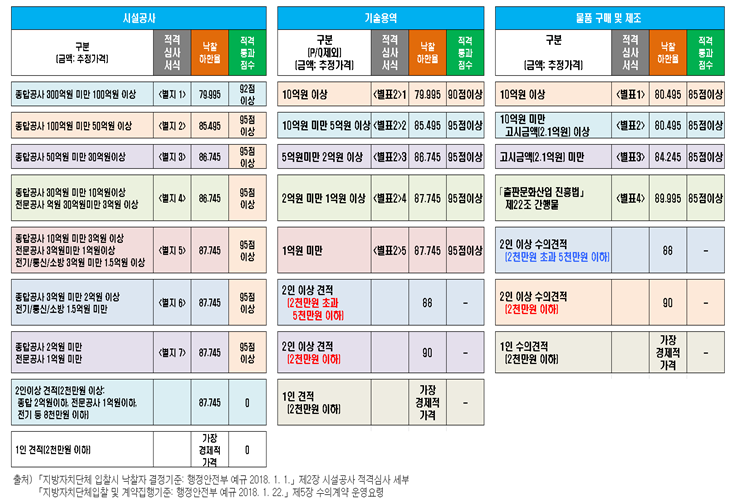

In [ ]:
#joined_df = joined_df.dropna(subset=['낙찰자결정방법'])
joined_df.isna().sum()

조달구분              0
입찰공고번호            0
입찰공고차수            0
입찰분류번호            0
수요기관구분            0
수요기관지역명           0
긴급공고여부         1124
추정가격             75
배정예산            129
기초금액           1826
예정가격              0
참가수               0
개찰순위             28
입찰률               0
입찰금액              3
낙찰자결정방법         756
입찰계약방법            0
업종제한여부            0
공동도급구성방식명       726
낙찰하한율          4261
입찰기간              0
정정공고여부            0
취소공고여부            0
재입찰허용여부           0
공동도급협정서접수방식       0
낙찰자결정여부           0
예가방법              0
낙찰업체투찰률           0
낙찰업체투찰금액          0
국제입찰여부            0
낙찰자결정적용법규      4443
지역제한여부            0
dtype: int64

In [ ]:
joined_df['낙찰자결정방법'].value_counts()

제한최저                                                              38118
제한적최저가(낙찰하한율)                                                      2729
추정가격 2억미만 1억이상(PQ비대상)                                              2041
협상에 의한 낙찰제                                                         1396
수의(견적제출)                                                           1054
최저가낙찰자결정                                                            995
최저가낙찰제                                                              961
추정가격 고시금액미만(건축사법에 따른 설계 1억미만)                                       860
추정가격 1억미만(PQ비대상)                                                    799
[환경부고시] 건설폐기물처리용역 적격업체 평가(추정가격 2억원미만)                               619
[조달청 기준] 시설분야용역 적격심사(추정가격 5억원미만)                                    553
제안서적격자중 예가내 최저투찰자                                                   533
[조달청 기준] 학술연구용역 적격심사(추정가격 고시금액미만)                                   303
[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만)                 

In [ ]:
joined_df['낙찰자결정방법'].fillna('알수없음',inplace=True)

In [ ]:
joined_df['낙찰하한율'].isna().sum() #낙찰하한율 대체 전

4261

In [ ]:
joined_df.loc[joined_df['낙찰자결정방법'].str.contains('10억이상'), '낙찰하한율'] = 79.995
joined_df.loc[joined_df['낙찰자결정방법'].str.contains('10억원이상'), '낙찰하한율'] = 79.995

joined_df.loc[joined_df['낙찰자결정방법'].str.contains('10억원미만'), '낙찰하한율'] = 85.495
joined_df.loc[joined_df['낙찰자결정방법'].str.contains('10억미만'), '낙찰하한율'] = 85.495

joined_df.loc[joined_df['낙찰자결정방법'].str.contains('5억원미만'), '낙찰하한율'] = 86.745
joined_df.loc[joined_df['낙찰자결정방법'].str.contains('5억미만'), '낙찰하한율'] = 86.745

joined_df.loc[joined_df['낙찰자결정방법'].str.contains('2억원미만'), '낙찰하한율'] = 87.745
joined_df.loc[joined_df['낙찰자결정방법'].str.contains('2억미만'), '낙찰하한율'] = 87.745

joined_df.loc[joined_df['낙찰자결정방법'].str.contains('1억원미만'), '낙찰하한율'] = 87.745
joined_df.loc[joined_df['낙찰자결정방법'].str.contains('1억미만'), '낙찰하한율'] = 87.745


In [ ]:
joined_df['낙찰하한율'].isna().sum() #낙찰하한율 대체 후

4136

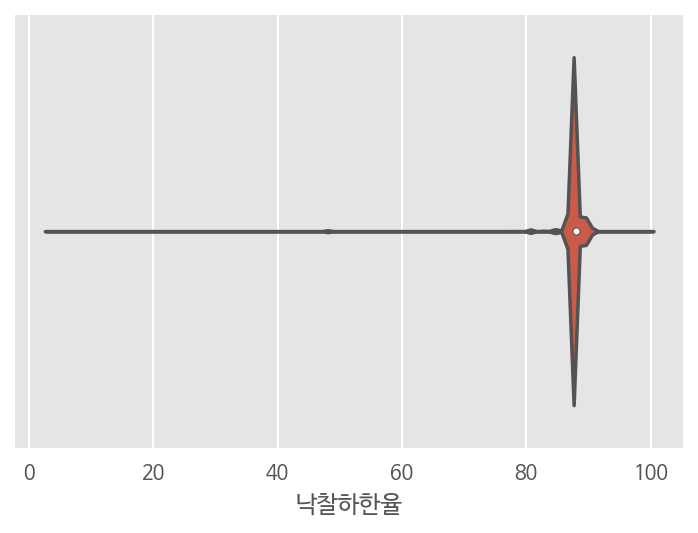

In [ ]:
sns.violinplot(joined_df['낙찰하한율'])

In [ ]:
joined_df['낙찰하한율'].describe()

count    49109.000000
mean        87.982959
std          1.999094
min          3.000000
25%         88.000000
50%         88.000000
75%         88.000000
max        100.000000
Name: 낙찰하한율, dtype: float64

In [ ]:
q1 = joined_df['낙찰하한율'].quantile(0.25)
q3 = joined_df['낙찰하한율'].quantile(0.75)
iqr = q3 - q1

print(q1,q3, iqr)

88.0 88.0 0.0


낙찰하한율이 79% 이하인 것은 이상치로 판단하고 79% 이상인 것들로만 간추린다.

In [ ]:
joined_df = joined_df[joined_df['낙찰하한율'] >= 79]
joined_df.head(3)

,조달구분,입찰공고번호,입찰공고차수,입찰분류번호,수요기관구분,수요기관지역명,긴급공고여부,추정가격,배정예산,기초금액,예정가격,참가수,개찰순위,입찰률,입찰금액,낙찰자결정방법,입찰계약방법,업종제한여부,공동도급구성방식명,낙찰하한율,입찰기간,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,낙찰자결정여부,예가방법,낙찰업체투찰률,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,지역제한여부
0,자체조달,20210115607,0,0,교육기관,경기도,N,163071818.0,179379000.0,179379000.0,181397950.0,4.0,3.0,96.415092,174895000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,86.745,9,N,N,Y,해당없음,Y,복수예가,96.415,174895000.0,N,국가계약법,Y
1,자체조달,20210119213,0,0,교육기관,경기도,N,69286360.0,76215000.0,76215000.0,76736350.0,8.0,1.0,91.091119,69900000.0,[조달청 기준] 여객 육상운송용역 적격심사(추정가격 5억원미만-추정가격 고시금액미만),제한(총액),Y,공동수급불허,86.745,9,N,N,N,해당없음,Y,복수예가,91.091,69900000.0,N,국가계약법,Y
3,자체조달,20210120314,1,0,지방자치단체,경상남도,N,29177272.0,32095000.0,32095000.0,32065225.0,8.0,2.0,88.260079,28300793.0,제한최저,수의(총액)소액-견적입찰(2인 이상 견적 제출),Y,분담이행,88.000,2,Y,N,Y,협정서전자제출,Y,복수예가,88.260,28300793.0,N,지방계약법,Y


In [ ]:
joined_df['낙찰하한율'].isna().sum() #낙찰하한율 대체 후

0

### 기초금액 결측치 & 이상치 제거

In [ ]:
q1 = joined_df['기초금액'].quantile(0.25)
q3 = joined_df['기초금액'].quantile(0.75)
iqr = q3 - q1

joined_df = joined_df[(joined_df['기초금액']<=q3+1.5*iqr) & (joined_df['기초금액']>=q1-1.5*iqr)]
len(joined_df)

45793

### 배정예산 결측치 & 이상치 제거

In [ ]:
q1 = joined_df['배정예산'].quantile(0.25)
q3 = joined_df['배정예산'].quantile(0.75)
iqr = q3 - q1

joined_df = joined_df[(joined_df['배정예산']<=q3+1.5*iqr) & (joined_df['배정예산']>=q1-1.5*iqr)]
len(joined_df)

44236

### 입찰률 결측치 & 이상치 제거

In [ ]:
q1 = joined_df['입찰률'].quantile(0.25)
q3 = joined_df['입찰률'].quantile(0.75)
iqr = q3 - q1

joined_df = joined_df[(joined_df['입찰률']<=q3+1.5*iqr) & (joined_df['입찰률']>=q1-1.5*iqr)]
len(joined_df)

39740

### 낙찰업체투찰률 결측치 & 이상치 제거

In [ ]:
q1 = joined_df['낙찰업체투찰률'].quantile(0.25)
q3 = joined_df['낙찰업체투찰률'].quantile(0.75)
iqr = q3 - q1

joined_df = joined_df[(joined_df['낙찰업체투찰률']<=q3+1.5*iqr) & (joined_df['낙찰업체투찰률']>=q1-1.5*iqr)]
len(joined_df)

33861

### 그 외 변수들 결측치 삭제
그 외의 변수들은 결측치 비율이 한자리수대이며 대체 불가능하다고 판단하여 결측치가 포함된 row를 삭제하는 방식으로 진행했다.

In [ ]:
nan_counts = joined_df.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(joined_df)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
낙찰자결정적용법규,3020,0.089188
긴급공고여부,132,0.003898
공동도급구성방식명,71,0.002097
개찰순위,11,0.000325
입찰금액,3,0.000089
조달구분,0,0.000000
재입찰허용여부,0,0.000000
입찰기간,0,0.000000
정정공고여부,0,0.000000
취소공고여부,0,0.000000


In [ ]:
joined_df['낙찰자결정적용법규'].value_counts()

지방계약법    25860
국가계약법     4981
Name: 낙찰자결정적용법규, dtype: int64

In [ ]:
joined_df = joined_df[joined_df['낙찰자결정적용법규'].isnull()==False]
len(joined_df)

30841

낙찰자결정적용법규는 결측치 대체가 불가하므로 결측치 있는 row 삭제

In [ ]:
joined_df['긴급공고여부'].value_counts()

N    27251
Y     3458
Name: 긴급공고여부, dtype: int64

긴급공고여부 null값이 N을 의미하는지 확실하지 않으므로 결측치 있는 row 삭제

In [ ]:
joined_df = joined_df[joined_df['긴급공고여부'].isnull()==False]
len(joined_df)

30709

그 외 결측치 있는 row 삭제

In [ ]:
joined_df_fin = joined_df.dropna(axis=0)
len(joined_df_fin)

30696

In [ ]:
nan_counts = joined_df_fin.isnull().sum().to_frame('nan_count')
nan_counts['결측치비율'] = nan_counts['nan_count']/len(joined_df_fin)
nan_counts.sort_values('결측치비율', ascending=False)

,nan_count,결측치비율
조달구분,0,0.0
입찰공고번호,0,0.0
낙찰자결정적용법규,0,0.0
국제입찰여부,0,0.0
낙찰업체투찰금액,0,0.0
낙찰업체투찰률,0,0.0
예가방법,0,0.0
낙찰자결정여부,0,0.0
공동도급협정서접수방식,0,0.0
재입찰허용여부,0,0.0


범주형 변수들 확인 - 범주가 1가지 뿐인 변수 삭제

In [ ]:
print(len(joined_df['조달구분'].unique()))
print(len(joined_df['수요기관구분'].unique()))
print(len(joined_df['낙찰자결정방법'].unique()))
print(len(joined_df['입찰계약방법'].unique()))
print(len(joined_df['공동도급구성방식명'].unique()))
print(len(joined_df['공동도급협정서접수방식'].unique()))
print(len(joined_df['예가방법'].unique()))
print(len(joined_df['낙찰자결정적용법규'].unique()))

2
9
24
23
5
3
1
2


In [ ]:
joined_df['예가방법'].value_counts()

복수예가    30709
Name: 예가방법, dtype: int64

예가방법은 value가 1가지 뿐이므로 삭제

In [ ]:
joined_df.drop(['예가방법'],axis='columns',inplace=True)
joined_df.columns

Index(['조달구분', '입찰공고번호', '입찰공고차수', '입찰분류번호', '수요기관구분', '수요기관지역명', '긴급공고여부',
       '추정가격', '배정예산', '기초금액', '예정가격', '참가수', '개찰순위', '입찰률', '입찰금액', '낙찰자결정방법',
       '입찰계약방법', '업종제한여부', '공동도급구성방식명', '낙찰하한율', '입찰기간', '정정공고여부', '취소공고여부',
       '재입찰허용여부', '공동도급협정서접수방식', '낙찰자결정여부', '낙찰업체투찰률', '낙찰업체투찰금액', '국제입찰여부',
       '낙찰자결정적용법규', '지역제한여부'],
      dtype='object')

In [ ]:
joined_df['조달구분'].value_counts()

자체조달    30703
중앙조달        6
Name: 조달구분, dtype: int64

조달구분은 전처리 이후 중앙조달값을 가지는 데이터가 9개 뿐이므로 조달구분은 자체조달로 한정한다.

In [ ]:
joined_df = joined_df[joined_df['조달구분']=='자체조달']
joined_df['조달구분'].value_counts()

자체조달    30703
Name: 조달구분, dtype: int64

조달구분은 자체조달 뿐이므로 변수 삭제를 진행하였다.

In [ ]:
joined_df.drop(['조달구분'],axis='columns',inplace=True)
joined_df.columns

Index(['입찰공고번호', '입찰공고차수', '입찰분류번호', '수요기관구분', '수요기관지역명', '긴급공고여부', '추정가격',
       '배정예산', '기초금액', '예정가격', '참가수', '개찰순위', '입찰률', '입찰금액', '낙찰자결정방법',
       '입찰계약방법', '업종제한여부', '공동도급구성방식명', '낙찰하한율', '입찰기간', '정정공고여부', '취소공고여부',
       '재입찰허용여부', '공동도급협정서접수방식', '낙찰자결정여부', '낙찰업체투찰률', '낙찰업체투찰금액', '국제입찰여부',
       '낙찰자결정적용법규', '지역제한여부'],
      dtype='object')

# 가격 관련 변수들 로그 변환

여러 번의 실험 결과 가격 관련 변수들은 log변환을 했을 때가 더 정확했기 때문에 log변환을 진행해주었다.

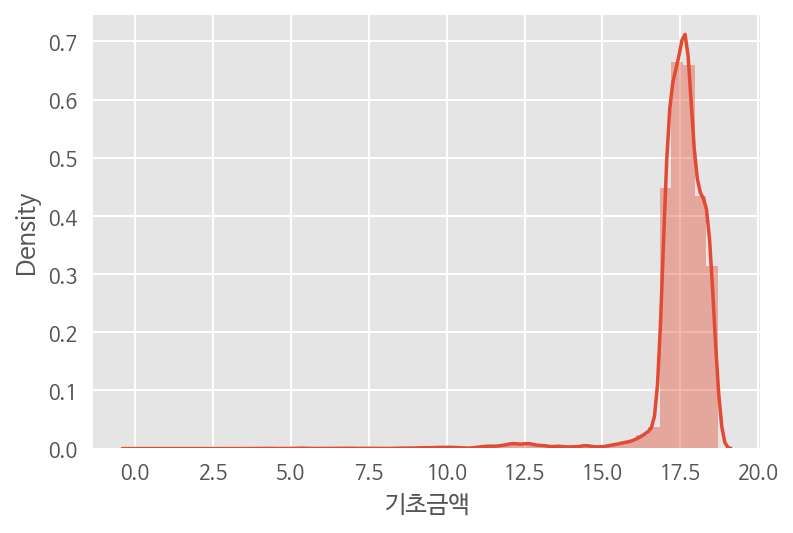

In [ ]:
joined_df['기초금액'] = np.log1p(joined_df['기초금액'])
sns.distplot(joined_df['기초금액'])

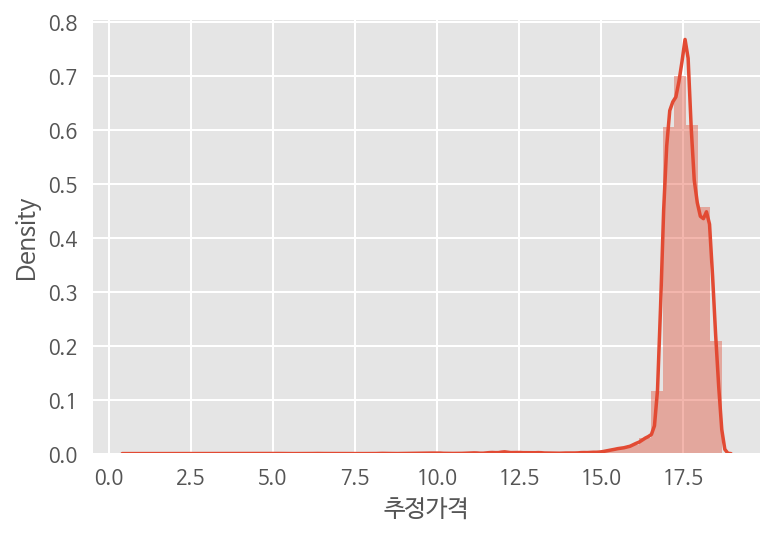

In [ ]:
joined_df['추정가격'] = np.log1p(joined_df['추정가격'])
sns.distplot(joined_df['추정가격'])

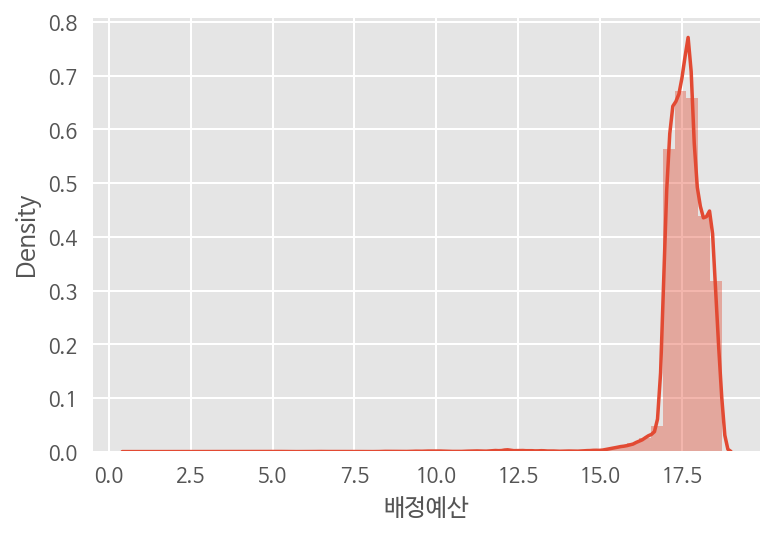

In [ ]:
joined_df['배정예산'] = np.log1p(joined_df['배정예산'])
sns.distplot(joined_df['배정예산'])

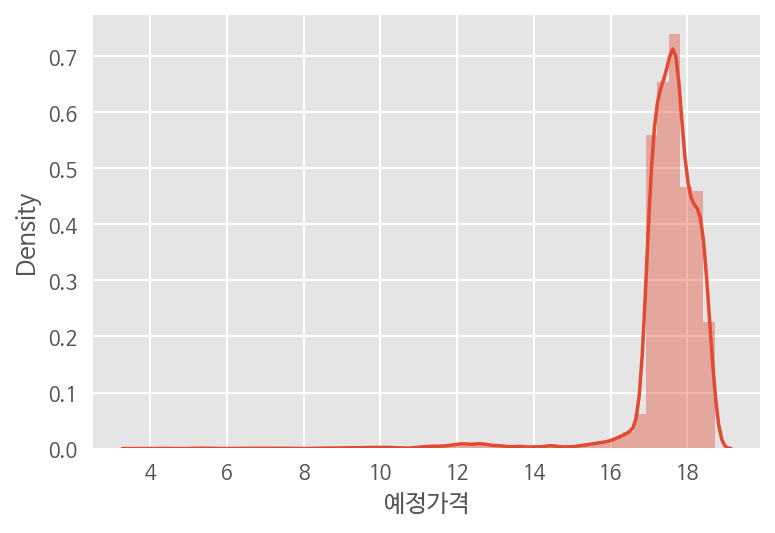

In [ ]:
joined_df['예정가격'] = np.log1p(joined_df['예정가격'])
sns.distplot(joined_df['예정가격'])

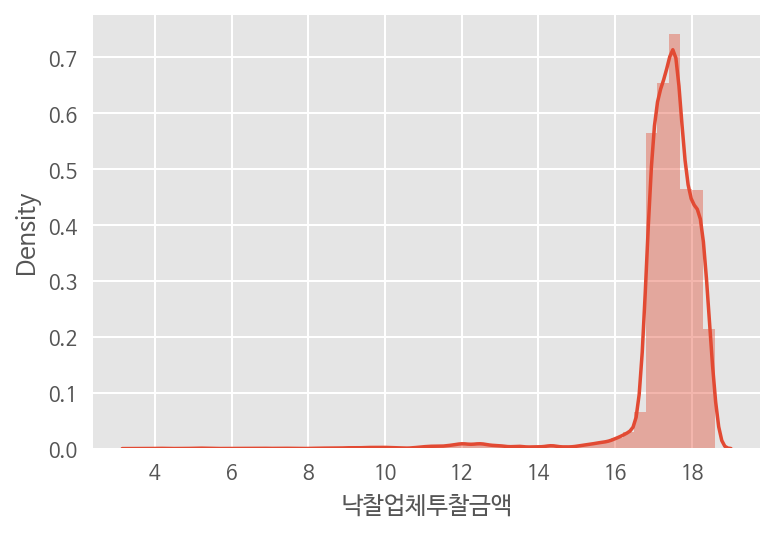

In [ ]:
joined_df['낙찰업체투찰금액'] = np.log1p(joined_df['낙찰업체투찰금액'])
sns.distplot(joined_df['낙찰업체투찰금액'])

## 전처리 파일 저장

In [ ]:
joined_df_fin = joined_df.drop(['입찰공고번호', '입찰공고차수', '입찰분류번호', # join key 역할 했던 변수 제거
                            '개찰순위', '입찰률', '입찰금액','낙찰업체투찰률', # 입찰 중에는 알 수 없는 변수 제거
                            '낙찰자결정방법',# 범주 많은 변수 제거
                            '입찰계약방법' ],axis='columns')# 범주 하나뿐인 변수 제거
joined_df_fin.columns

Index(['수요기관구분', '수요기관지역명', '긴급공고여부', '추정가격', '배정예산', '기초금액', '예정가격', '참가수',
       '업종제한여부', '공동도급구성방식명', '낙찰하한율', '입찰기간', '정정공고여부', '취소공고여부', '재입찰허용여부',
       '공동도급협정서접수방식', '낙찰자결정여부', '낙찰업체투찰금액', '국제입찰여부', '낙찰자결정적용법규', '지역제한여부'],
      dtype='object')

In [ ]:
joined_df_fin.head(n=1)

,수요기관구분,수요기관지역명,긴급공고여부,추정가격,배정예산,기초금액,예정가격,참가수,업종제한여부,공동도급구성방식명,낙찰하한율,입찰기간,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,낙찰자결정여부,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,지역제한여부
3,지방자치단체,경상남도,N,17.188901,17.284211,17.284211,17.283283,8.0,Y,분담이행,88.0,2,Y,N,Y,협정서전자제출,Y,17.1584,N,지방계약법,Y


In [ ]:
joined_df_fin.to_csv(path+'cleaned_data.csv',index=False)

# Hyper parameter 찾기

In [ ]:
df = pd.read_csv(path+'cleaned_data.csv')
df.head(n=1)

,수요기관구분,수요기관지역명,긴급공고여부,추정가격,배정예산,기초금액,예정가격,참가수,업종제한여부,공동도급구성방식명,낙찰하한율,입찰기간,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,낙찰자결정여부,낙찰업체투찰금액,국제입찰여부,낙찰자결정적용법규,지역제한여부
0,지방자치단체,경상남도,N,17.188901,17.284211,17.284211,17.283283,8.0,Y,분담이행,88.0,2,Y,N,Y,협정서전자제출,Y,17.1584,N,지방계약법,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30703 entries, 0 to 30702
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   수요기관구분       30703 non-null  object 
 1   수요기관지역명      30703 non-null  object 
 2   긴급공고여부       30703 non-null  object 
 3   추정가격         30703 non-null  float64
 4   배정예산         30703 non-null  float64
 5   기초금액         30703 non-null  float64
 6   예정가격         30703 non-null  float64
 7   참가수          30703 non-null  float64
 8   업종제한여부       30703 non-null  object 
 9   공동도급구성방식명    30703 non-null  object 
 10  낙찰하한율        30703 non-null  float64
 11  입찰기간         30703 non-null  int64  
 12  정정공고여부       30703 non-null  object 
 13  취소공고여부       30703 non-null  object 
 14  재입찰허용여부      30703 non-null  object 
 15  공동도급협정서접수방식  30703 non-null  object 
 16  낙찰자결정여부      30703 non-null  object 
 17  낙찰업체투찰금액     30703 non-null  float64
 18  국제입찰여부       30703 non-null  object 
 19  낙찰자결

In [ ]:
df.columns

Index(['수요기관구분', '수요기관지역명', '긴급공고여부', '추정가격', '배정예산', '기초금액', '예정가격', '참가수',
       '업종제한여부', '공동도급구성방식명', '낙찰하한율', '입찰기간', '정정공고여부', '취소공고여부', '재입찰허용여부',
       '공동도급협정서접수방식', '낙찰자결정여부', '낙찰업체투찰금액', '국제입찰여부', '낙찰자결정적용법규', '지역제한여부'],
      dtype='object')

X변수들 간 corr plot 확인

In [ ]:
joined_df_fin_float = df[['추정가격',	'배정예산',	'기초금액',	'예정가격',	'참가수',	'낙찰하한율',	'입찰기간','낙찰업체투찰금액']]
joined_df_fin_float

,추정가격,배정예산,기초금액,예정가격,참가수,낙찰하한율,입찰기간,낙찰업체투찰금액
0,17.188901,17.284211,17.284211,17.283283,8.0,88.000,2,17.158400
1,17.897045,17.992335,17.992335,17.985676,2.0,84.245,6,17.858562
2,17.885904,17.981214,17.981214,17.973526,5.0,88.000,3,17.852579
3,18.374046,18.469357,18.469357,18.457378,8.0,88.000,3,18.335401
4,17.575547,17.670857,17.670857,17.675802,34.0,88.000,2,17.550562
...,...,...,...,...,...,...,...,...
30698,17.307047,17.402357,17.402357,17.410501,19.0,88.000,3,17.298429
30699,17.157948,17.253258,17.253258,17.245875,4.0,88.000,3,17.122525
30700,17.996867,18.092177,18.092177,18.086257,6.0,88.000,2,17.960700
30701,16.840669,16.935979,16.935979,16.920682,4.0,88.000,2,16.806482


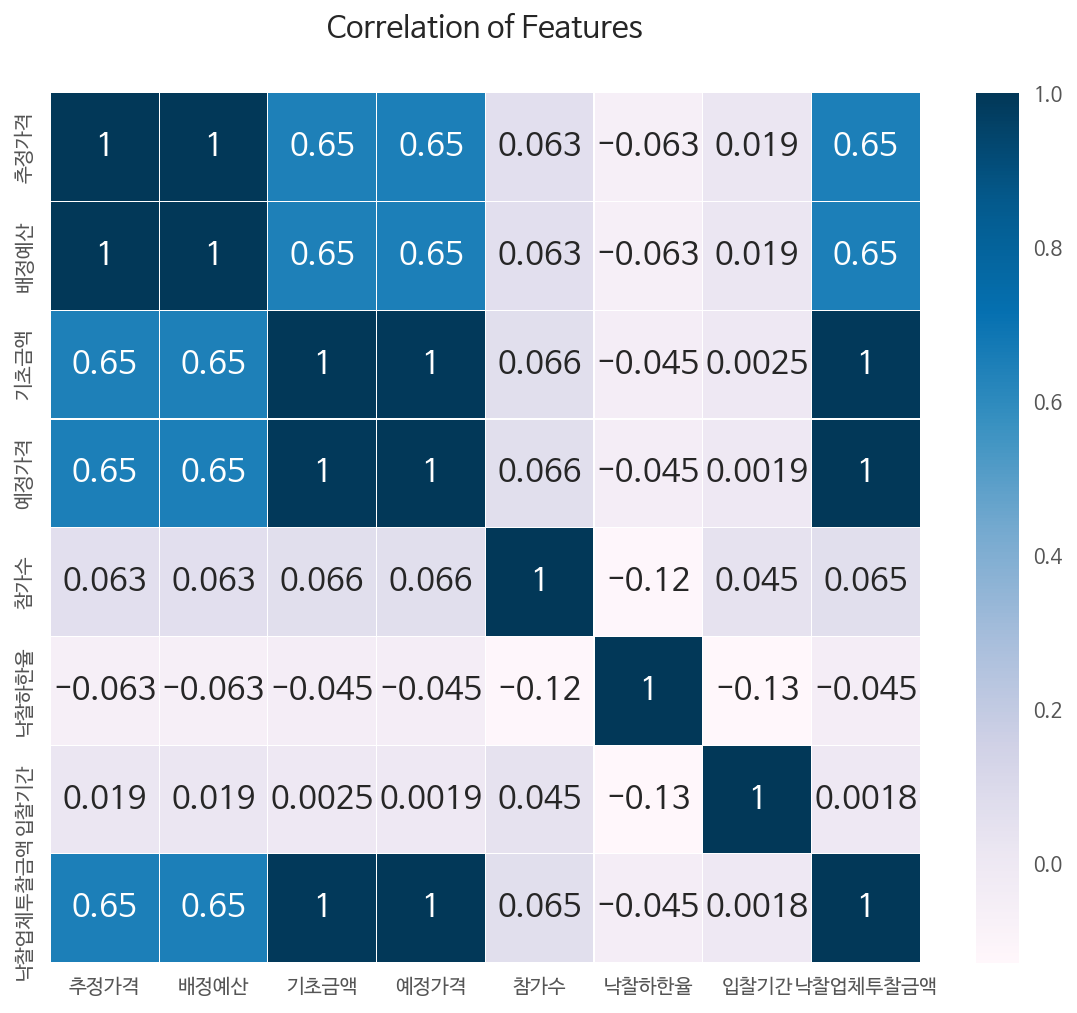

In [ ]:
colormap = plt.cm.PuBu 
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 8)) 
plt.title("Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(joined_df_fin_float.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, 
            annot_kws = {"size" : 16})

1. 배정예산=추정가격 같은의미(corr가 1이기 때문) -> '배정예산' 선택
2. 예정가격=기초금액 같은의미(corr가 1이기 때문) -> '기초금액' 선택

In [ ]:
df.columns

Index(['수요기관구분', '수요기관지역명', '긴급공고여부', '추정가격', '배정예산', '기초금액', '예정가격', '참가수',
       '업종제한여부', '공동도급구성방식명', '낙찰하한율', '입찰기간', '정정공고여부', '취소공고여부', '재입찰허용여부',
       '공동도급협정서접수방식', '낙찰자결정여부', '낙찰업체투찰금액', '국제입찰여부', '낙찰자결정적용법규', '지역제한여부'],
      dtype='object')

겹치는 변수 제거

In [ ]:
df.drop(['추정가격', '예정가격', '참가수', '낙찰자결정여부','낙찰하한율'],axis='columns',inplace=True)
df.columns

Index(['수요기관구분', '수요기관지역명', '긴급공고여부', '배정예산', '기초금액', '업종제한여부', '공동도급구성방식명',
       '입찰기간', '정정공고여부', '취소공고여부', '재입찰허용여부', '공동도급협정서접수방식', '낙찰업체투찰금액',
       '국제입찰여부', '낙찰자결정적용법규', '지역제한여부'],
      dtype='object')

In [ ]:
X = df.drop(['낙찰업체투찰금액'], axis=1)
y = df['낙찰업체투찰금액']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30703 entries, 0 to 30702
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   수요기관구분       30703 non-null  object 
 1   수요기관지역명      30703 non-null  object 
 2   긴급공고여부       30703 non-null  object 
 3   배정예산         30703 non-null  float64
 4   기초금액         30703 non-null  float64
 5   업종제한여부       30703 non-null  object 
 6   공동도급구성방식명    30703 non-null  object 
 7   입찰기간         30703 non-null  int64  
 8   정정공고여부       30703 non-null  object 
 9   취소공고여부       30703 non-null  object 
 10  재입찰허용여부      30703 non-null  object 
 11  공동도급협정서접수방식  30703 non-null  object 
 12  국제입찰여부       30703 non-null  object 
 13  낙찰자결정적용법규    30703 non-null  object 
 14  지역제한여부       30703 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 3.5+ MB


데이터 수가 적기 때문에 8:2로 train, test set split을 진행했다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (24562, 15)
y train shape:  (24562,)
X test shape:  (6141, 15)
y test shape:  (6141,)


## AUTO ML
AUTO ML은 모델을 학습하고 평가할 때 다양한 알고리즘들과 연관된 hyper parameter 들을 실험하고 성능을 비교하여 최상의 성능을 갖는 모델을 찾는 과정을 자동화 하는 문제를 해결하기 위한 도구로서 개발되었기 때문에 AUTO ML을 사용하여 효율적인 hyper parameter 찾기를 진행하였다.

조달구분	수요기관구분	수요기관지역명	긴급공고여부	배정예산	기초금액	업종제한여부	공동도급구성방식명	입찰기간	정정공고여부	취소공고여부	재입찰허용여부	공동도급협정서접수방식	예가방법	국제입찰여부	낙찰자결정적용법규	지역제한여부을 모두 X변수로 넣고 automl을 돌려 feature importance와 각 모델의 hyper parameter를 찾아보았다.

In [ ]:
newdf_xy = pd.concat([X_train,y_train], axis=1)
newdf_xy

,수요기관구분,수요기관지역명,긴급공고여부,배정예산,기초금액,업종제한여부,공동도급구성방식명,입찰기간,정정공고여부,취소공고여부,재입찰허용여부,공동도급협정서접수방식,국제입찰여부,낙찰자결정적용법규,지역제한여부,낙찰업체투찰금액
26625,지방자치단체,강원도,N,17.616334,17.616334,Y,공동수급불허,6,N,N,Y,해당없음,N,지방계약법,Y,17.482977
7260,지방자치단체,울산광역시,N,18.172219,18.172219,Y,공동수급불허,4,N,N,Y,해당없음,N,지방계약법,Y,18.051282
13627,지방자치단체,전라남도,Y,18.644624,18.644624,N,분담이행,3,Y,N,Y,협정서전자제출,N,지방계약법,Y,18.526796
28955,지방자치단체,강원도,N,18.236914,18.236914,Y,공동수급불허,6,N,N,Y,해당없음,N,지방계약법,Y,18.114237
3422,지방자치단체,경상남도,N,17.727534,17.727534,Y,공동수급불허,5,N,N,Y,해당없음,N,지방계약법,Y,17.606852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,지방자치단체,충청남도,N,17.882587,17.882587,Y,공동수급불허,3,N,N,Y,해당없음,N,지방계약법,Y,17.757003
27516,지방자치단체,인천광역시,N,17.583520,17.583520,Y,공동수급불허,4,N,N,Y,해당없음,N,지방계약법,Y,17.458437
9526,지방자치단체,경기도,N,17.553180,17.553180,N,분담이행,5,N,N,Y,협정서전자제출,N,지방계약법,Y,17.423803
9771,공기업,서울특별시,Y,18.550252,18.550252,Y,공동수급불허,4,N,N,Y,해당없음,N,국가계약법,N,18.419834


In [ ]:
reg = setup(newdf_xy, target='낙찰업체투찰금액', train_size = 0.8)

,Description,Value
0,session_id,2719
1,Target,낙찰업체투찰금액
2,Original Data,"(24562, 16)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(19649, 57)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0090,0.0103,0.0443,0.9937,0.0043,0.0006,0.181
rf,Random Forest Regressor,0.0071,0.0101,0.0450,0.9938,0.0044,0.0005,9.766
huber,Huber Regressor,0.0064,0.0171,0.0477,0.9896,0.0067,0.0004,0.832
gbr,Gradient Boosting Regressor,0.0103,0.0109,0.0486,0.9933,0.0048,0.0006,2.211
et,Extra Trees Regressor,0.0077,0.0109,0.0530,0.9931,0.0052,0.0005,11.274
omp,Orthogonal Matching Pursuit,0.0096,0.0175,0.0616,0.9893,0.0083,0.0006,0.032
lar,Least Angle Regression,0.0099,0.0175,0.0618,0.9893,0.0083,0.0007,0.038
ridge,Ridge Regression,0.0099,0.0175,0.0619,0.9893,0.0083,0.0007,0.030
br,Bayesian Ridge,0.0099,0.0175,0.0619,0.9892,0.0083,0.0007,0.086
lightgbm,Light Gradient Boosting Machine,0.0183,0.0209,0.1304,0.9847,0.0147,0.0018,0.237


상위 3개의 모델은 dt, rf, huber

best3 모델 5-fold cross validation 진행하여 best hyper parameter 찾기

In [ ]:
auto_dt = create_model('dt', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0080,0.0001,0.0121,0.9999,0.0009,0.0005
1,0.0084,0.0003,0.0176,0.9998,0.0025,0.0006
2,0.0081,0.0002,0.0134,0.9998,0.0016,0.0005
3,0.0122,0.0545,0.2334,0.9608,0.0230,0.0008
4,0.0082,0.0002,0.0124,0.9999,0.0009,0.0005
Mean,0.0090,0.0111,0.0578,0.9920,0.0058,0.0006
SD,0.0016,0.0217,0.0878,0.0156,0.0086,0.0001


In [ ]:
print(auto_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2719, splitter='best')


In [ ]:
auto_rf = create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0061,0.0001,0.0095,0.9999,0.0008,0.0004
1,0.0066,0.0004,0.0193,0.9997,0.0034,0.0005
2,0.0076,0.0039,0.0621,0.9964,0.0074,0.0006
3,0.0099,0.0497,0.2229,0.9642,0.0208,0.0006
4,0.0065,0.0001,0.0121,0.9999,0.0013,0.0004
Mean,0.0073,0.0108,0.0652,0.9920,0.0067,0.0005
SD,0.0014,0.0195,0.0811,0.0140,0.0074,0.0001


In [ ]:
print(auto_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2719, verbose=0, warm_start=False)


In [ ]:
auto_huber = create_model('huber', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0052,0.0000,0.0068,1.0000,0.0004,0.0003
1,0.0054,0.0001,0.0071,1.0000,0.0004,0.0003
2,0.0055,0.0001,0.0071,1.0000,0.0004,0.0003
3,0.0103,0.0852,0.2919,0.9387,0.0452,0.0006
4,0.0055,0.0001,0.0071,1.0000,0.0004,0.0003
Mean,0.0064,0.0171,0.0640,0.9877,0.0093,0.0004
SD,0.0020,0.0341,0.1140,0.0245,0.0179,0.0001


In [ ]:
print(auto_huber)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


각 모델 plot확인

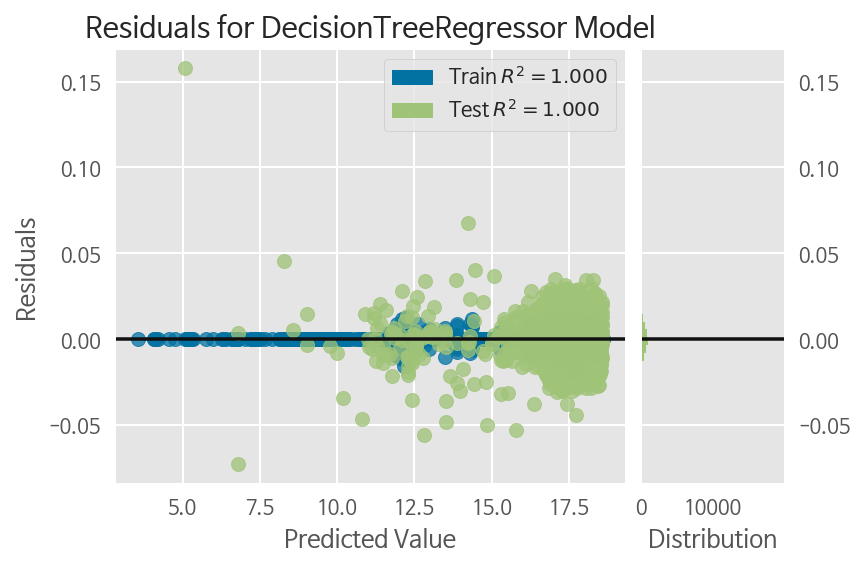

In [ ]:
plot_model(auto_dt)

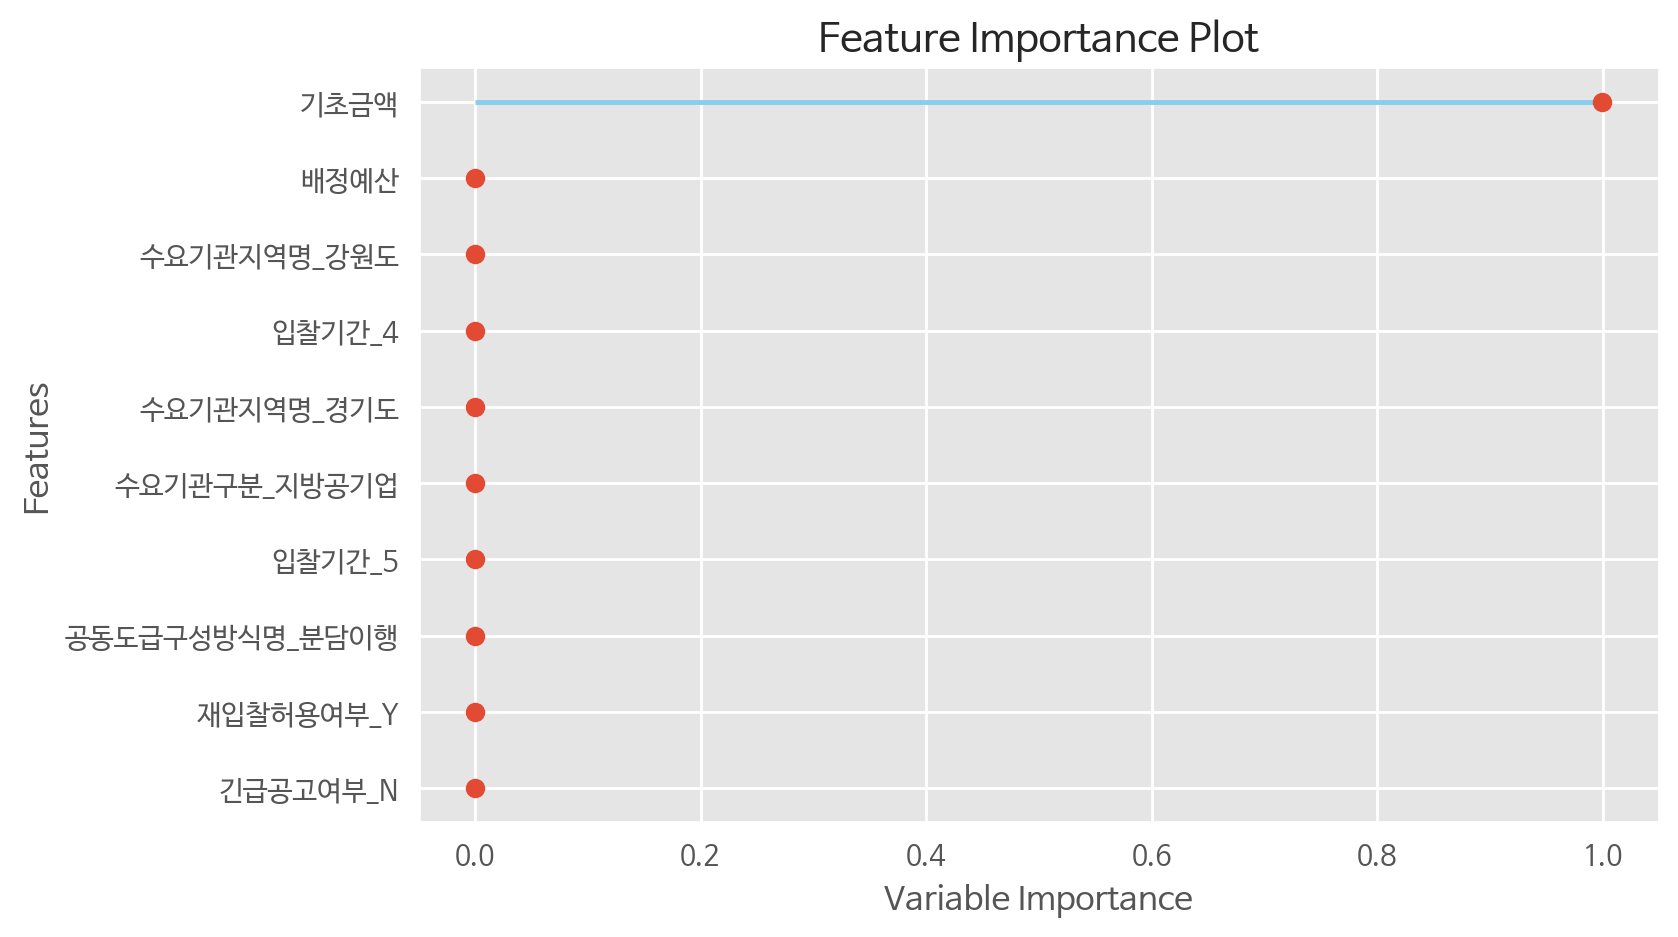

In [ ]:
plot_model(estimator = auto_dt, plot = 'feature')

*   기초금액의 중요도가 매우 높음
*   기초금액, 배정예산, 수요기관지역명, 입찰기간, 수요기관구분,공동도급구성방식명, 재입찰허용여부, 긴급공고여부




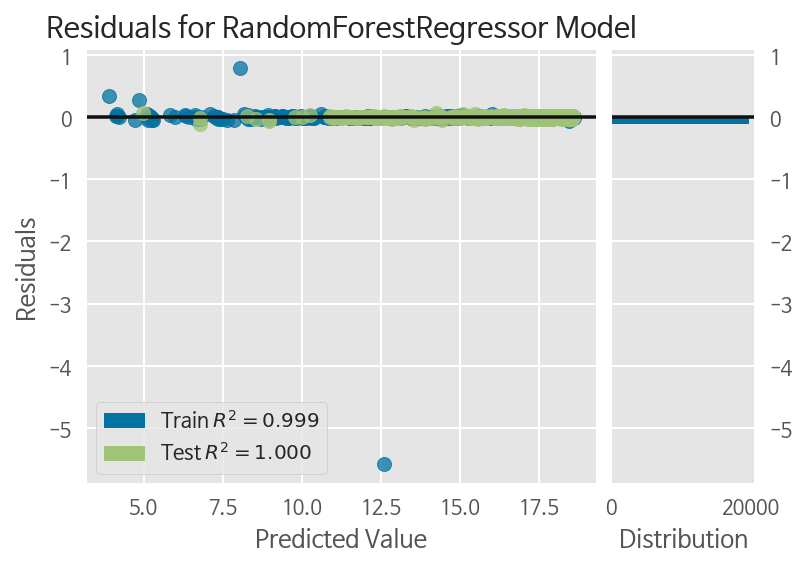

In [ ]:
plot_model(auto_rf)

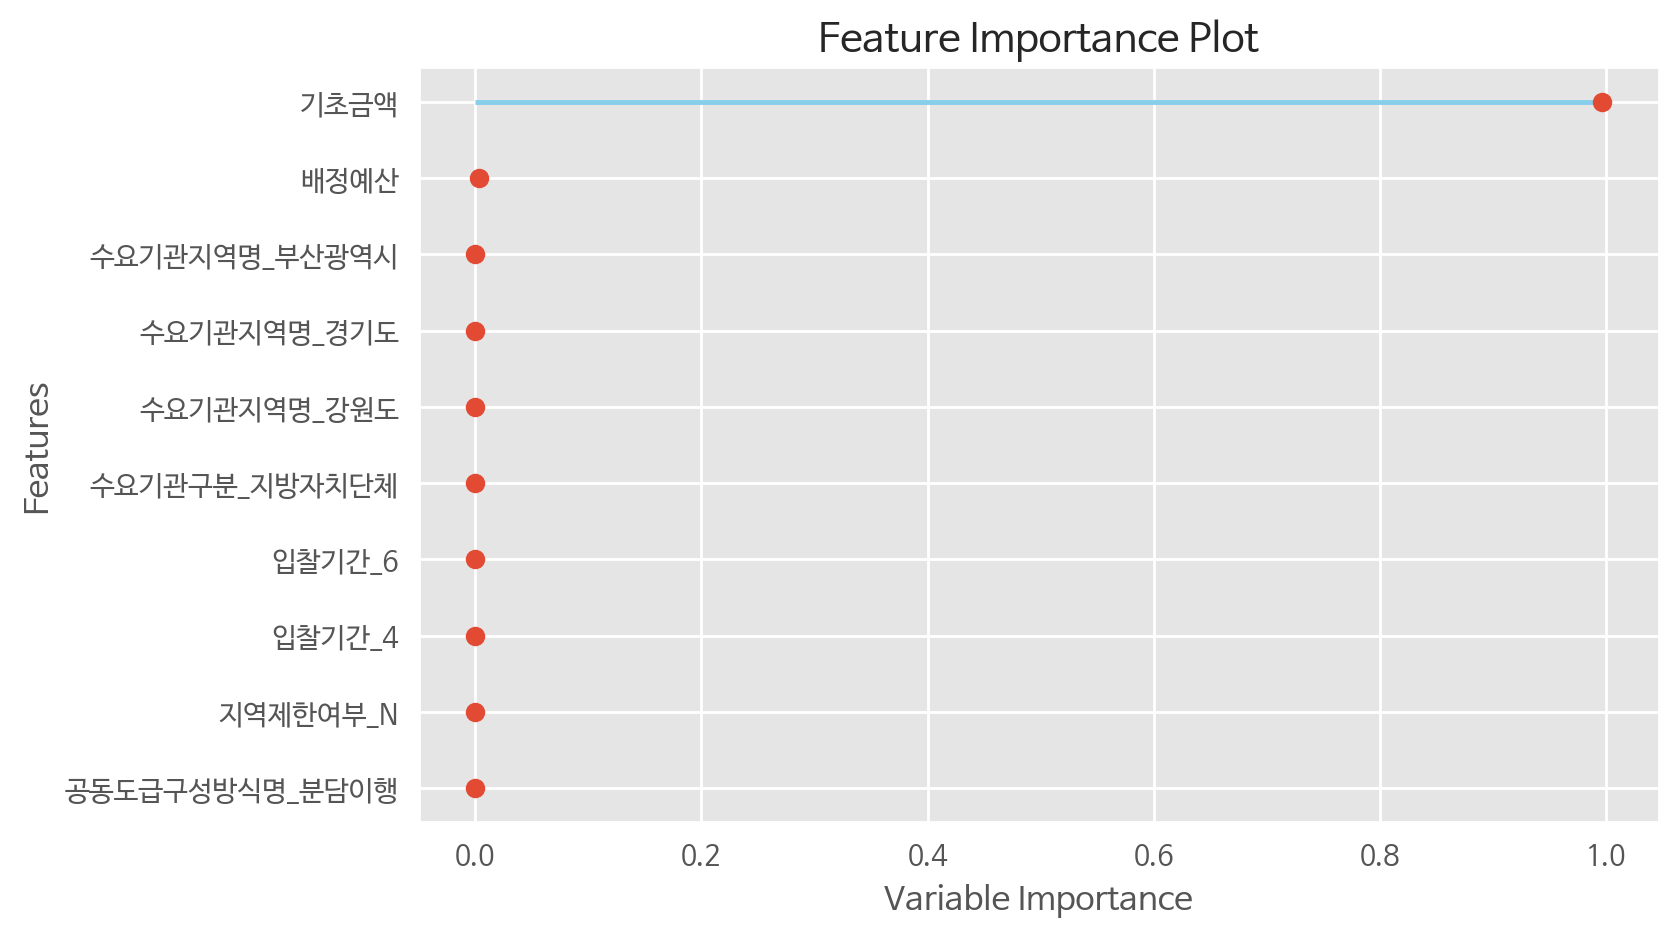

In [ ]:
plot_model(estimator = auto_rf, plot = 'feature')

*   기초금액의 중요도가 매우 높음
*   기초금액, 배정예산, 수요기관지역명, 입찰기간, 수요기관구분, 지역제한여부, 공동도급구성방식명



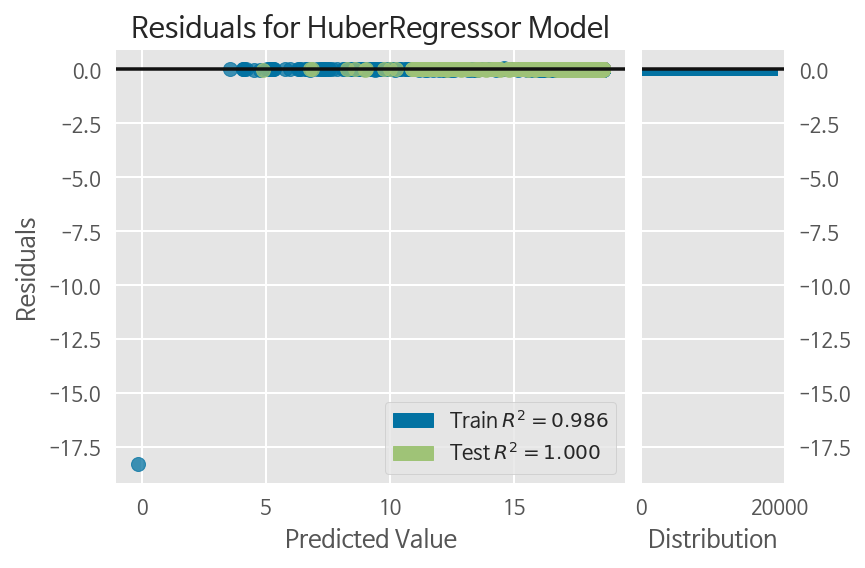

In [ ]:
plot_model(auto_huber)

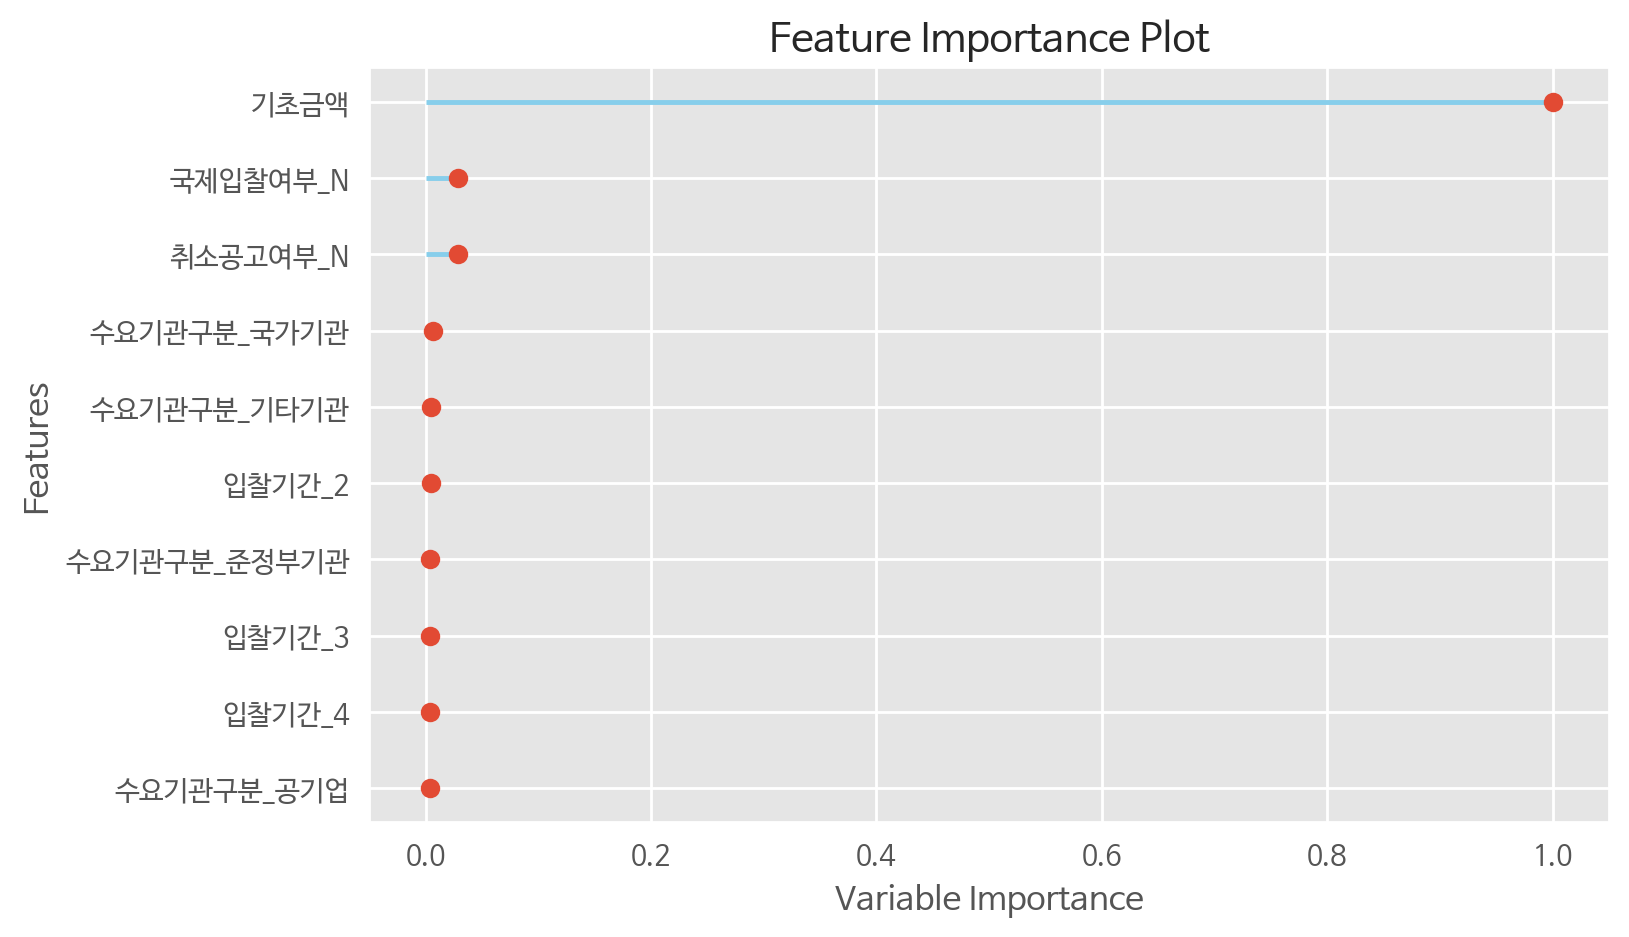

In [ ]:
plot_model(estimator = auto_huber, plot = 'feature')

*   기초금액의 중요도가 매우 높음
*   기초금액, 국제입찰여부, 취소공고여부, 수요기관구분, 입찰기간

best 3 모델 중 2개 이상의 모델에서 중요도 높은 변수들에 포함되는 변수들

: 기초금액, 수요기관구분, 입찰기간, 수요기관지역명, 배정예산, 공동도급구성방식명

따라서 이 변수들을 사용하여 모델링을 진행한다.